<a href="https://colab.research.google.com/github/aimlresearcher/AI-COURSE/blob/main/01_BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import deque

def bfs(graph, start, goal):
    queue = deque([start])  # Queue for BFS
    visited = set()         # Set to keep track of visited nodes
    parent = {}             # Dictionary to track parent nodes

    visited.add(start)
    parent[start] = None  # Start node has no parent

    while queue:
        current = queue.popleft()
        print(f"Dequeued: {current}, Queue: {list(queue)}")

        if current == goal:
            return reconstruct_path(parent, goal)

        for neighbor in graph.get(current, []):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)

    return None  # If goal is not found

def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse the path

# Graph representation (Adjacency List)
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['E', 'F'],
    'C': [],
    'D': ['G'],
    'E': ['H'],
    'F': ['I'],
    'G': ['J'],
    'H': [],
    'I': [],
    'J': []
}

# Start and Goal
start_node = 'A'
goal_node = 'J'

# Execute BFS
path = bfs(graph, start_node, goal_node)

# Display Result
if path:
    print("\nShortest Path:", " → ".join(path))
else:
    print("\nGoal not found in the graph.")


Dequeued: A, Queue: []
Dequeued: B, Queue: ['C', 'D']
Dequeued: C, Queue: ['D', 'E', 'F']
Dequeued: D, Queue: ['E', 'F']
Dequeued: E, Queue: ['F', 'G']
Dequeued: F, Queue: ['G', 'H']
Dequeued: G, Queue: ['H', 'I']
Dequeued: H, Queue: ['I', 'J']
Dequeued: I, Queue: ['J']
Dequeued: J, Queue: []

Shortest Path: A → D → G → J


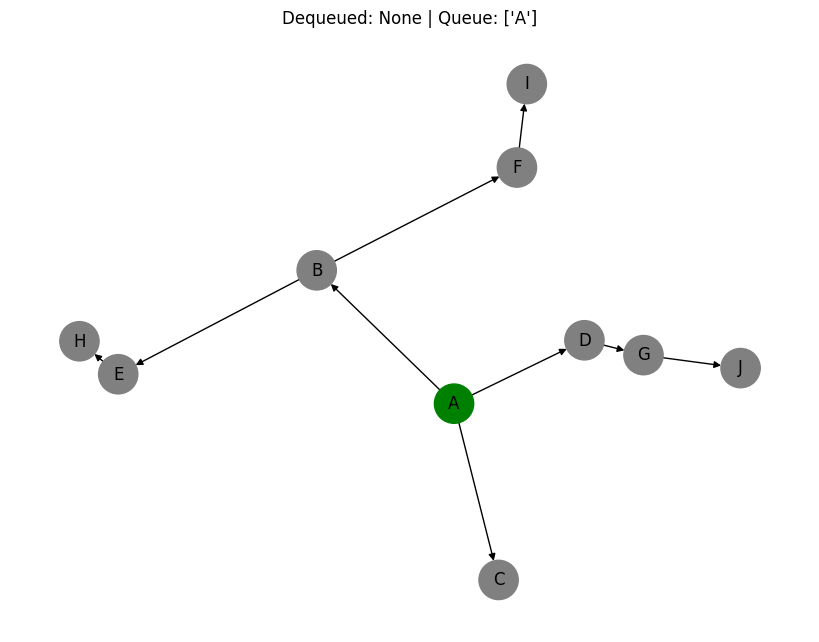

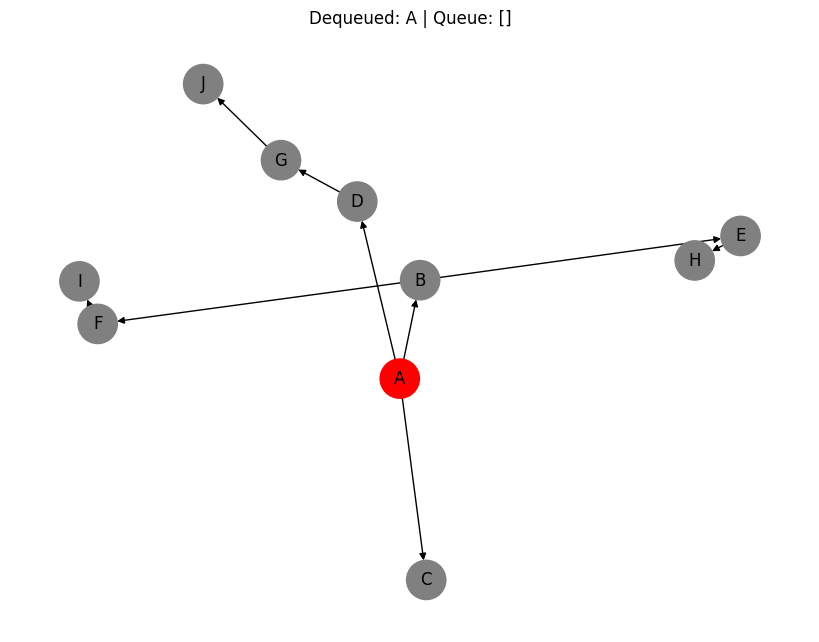

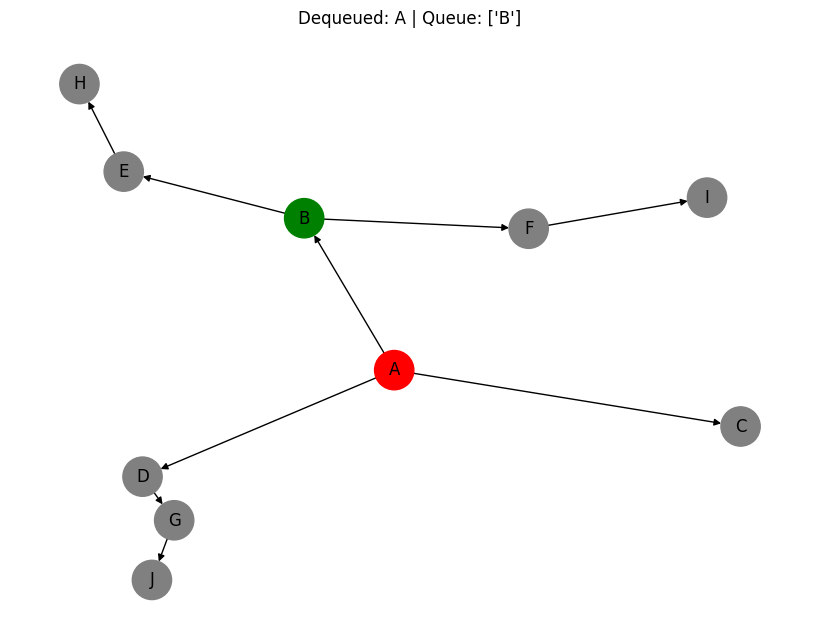

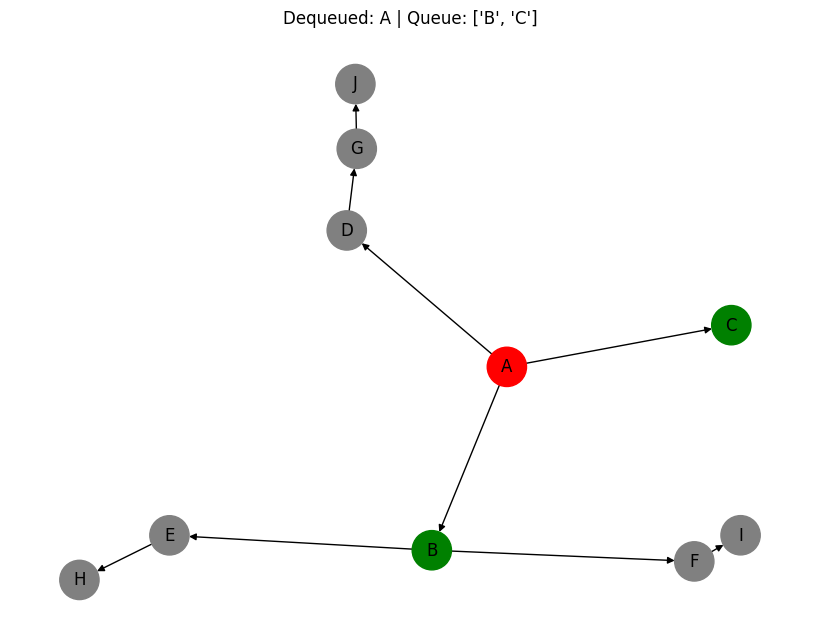

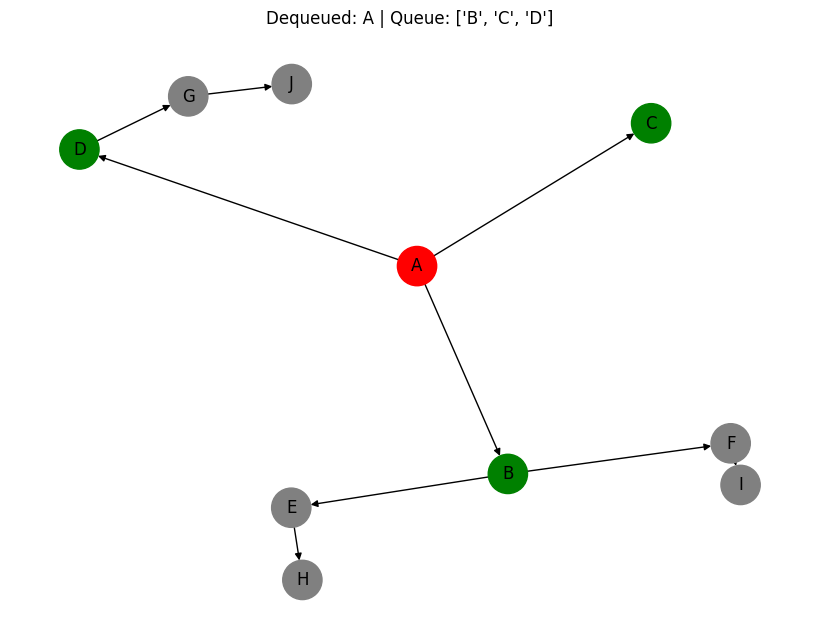

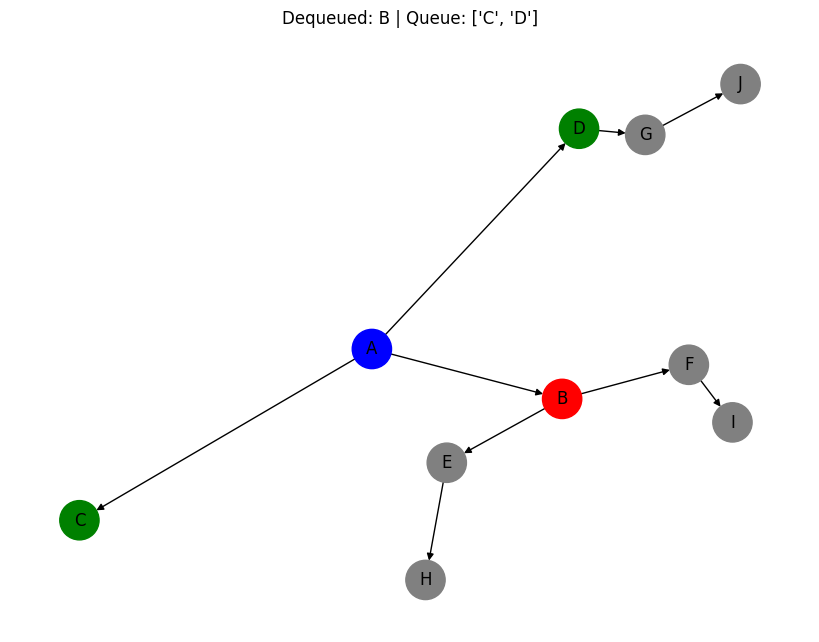

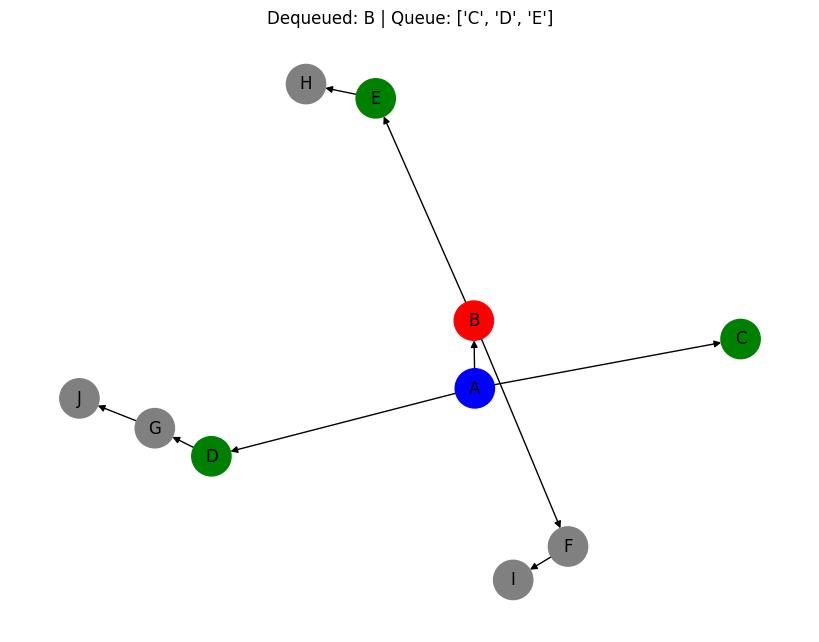

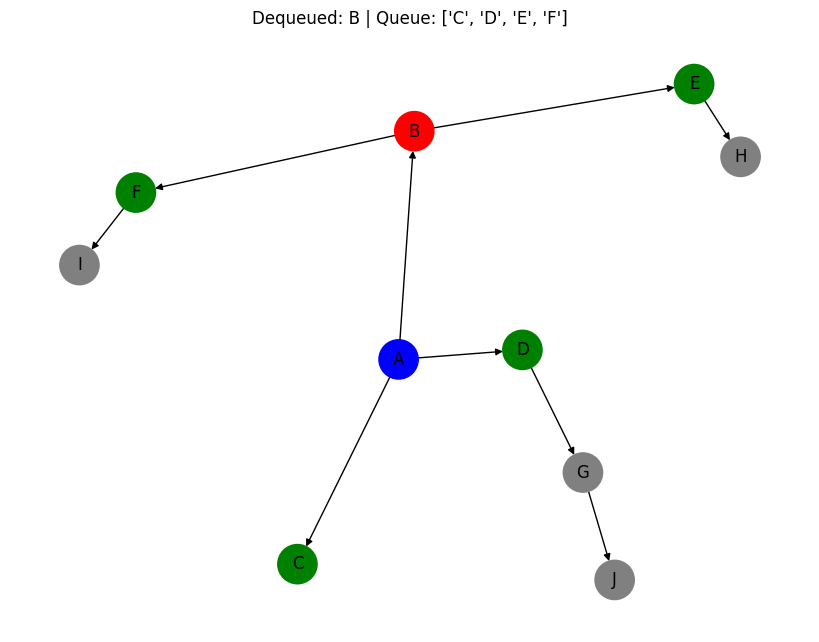

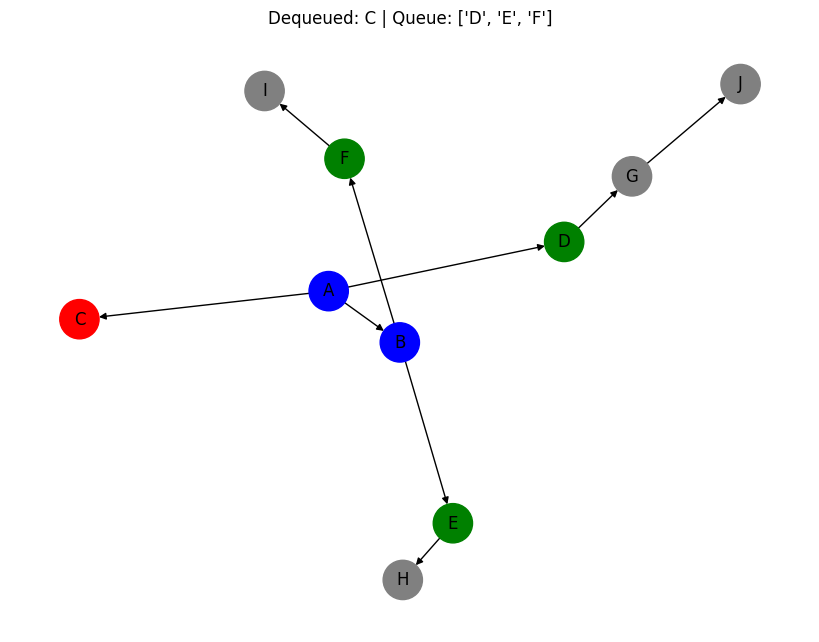

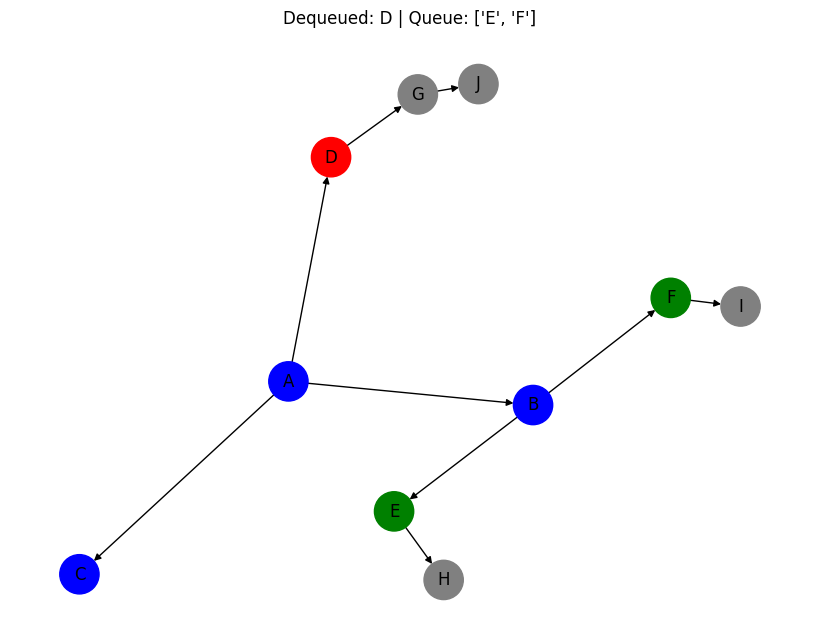

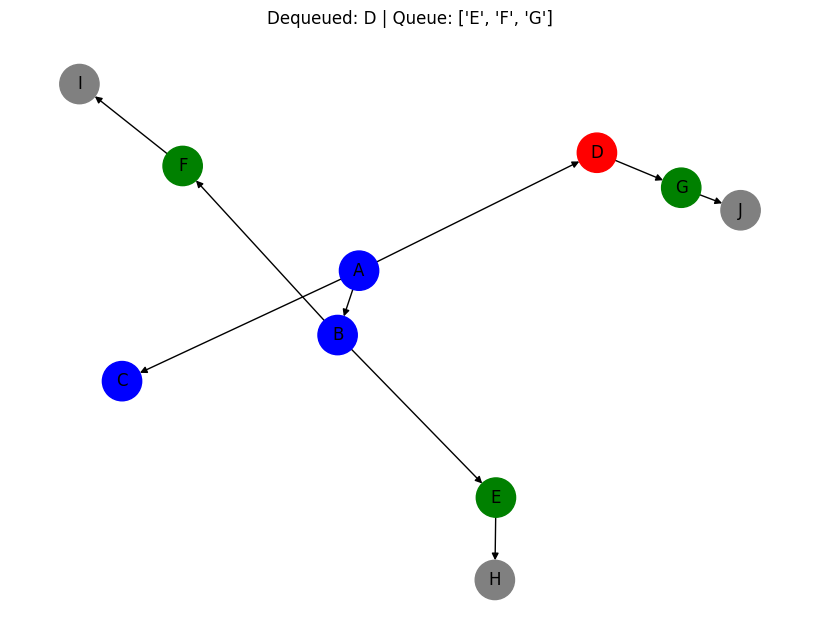

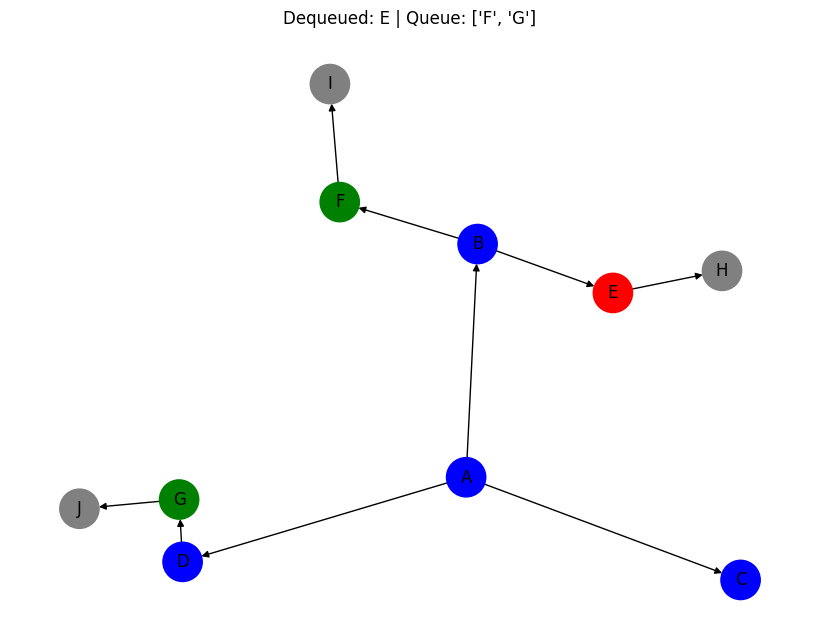

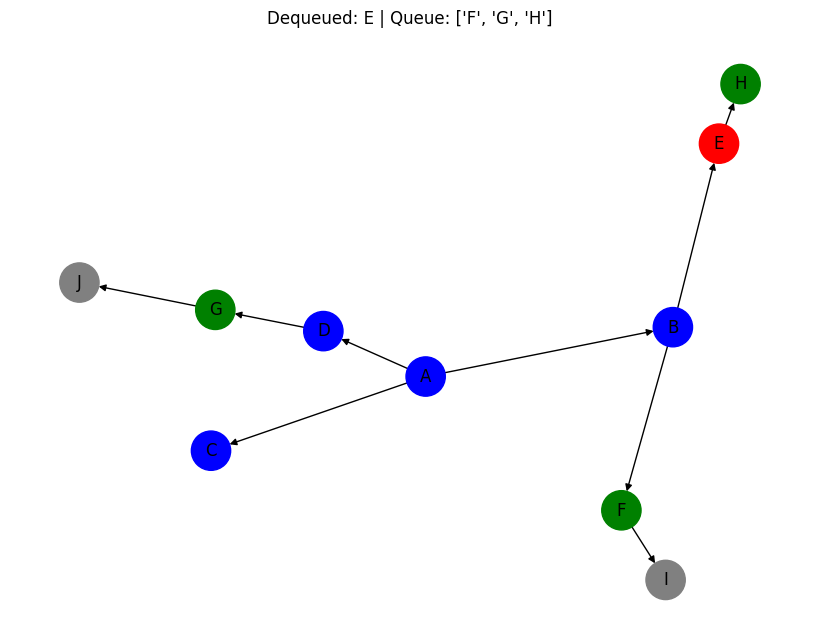

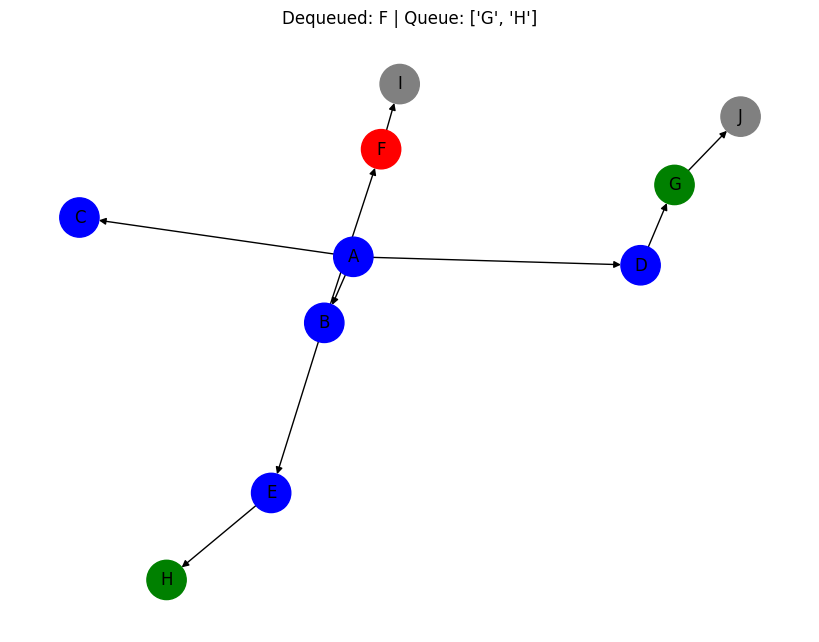

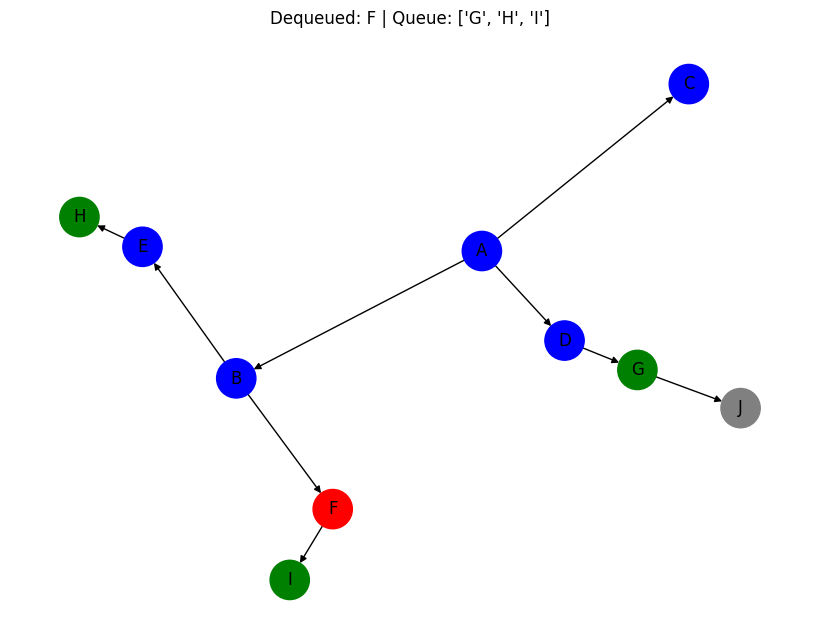

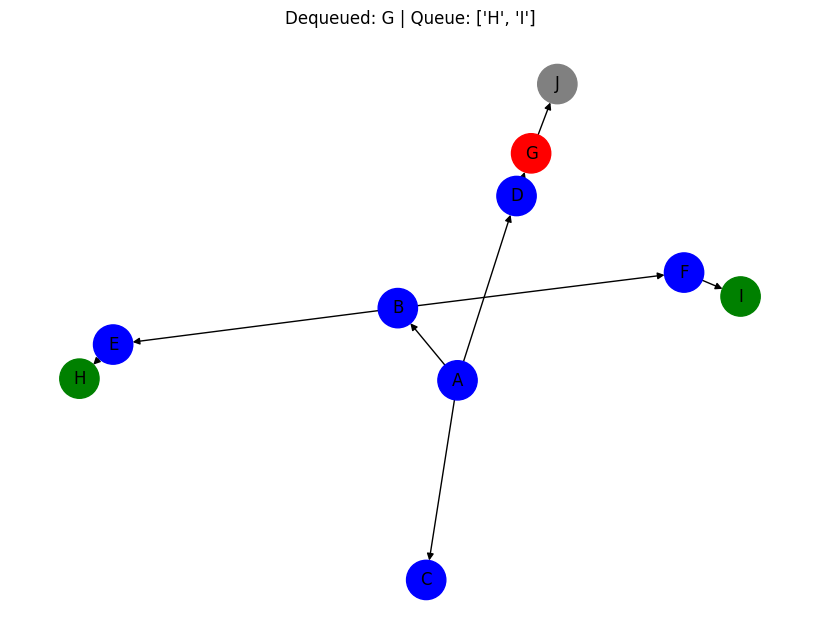

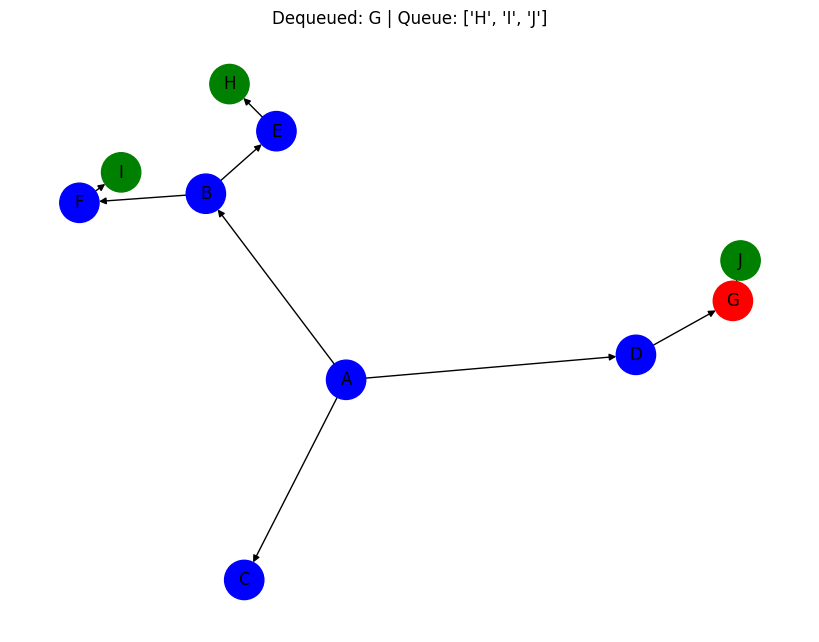

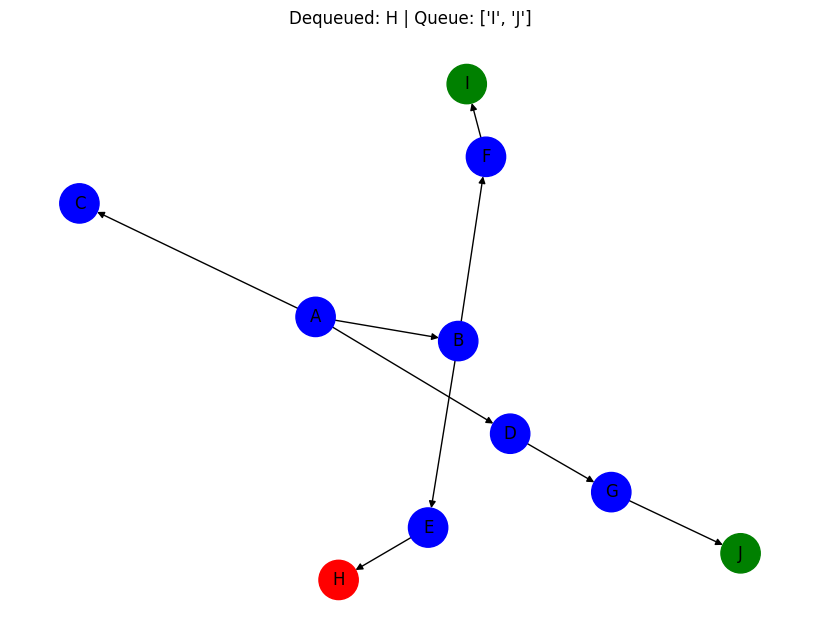

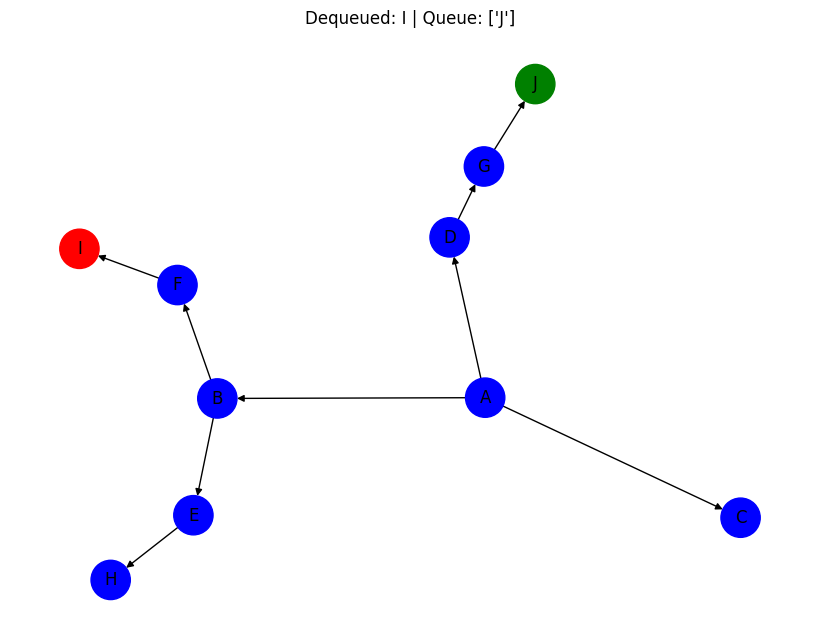

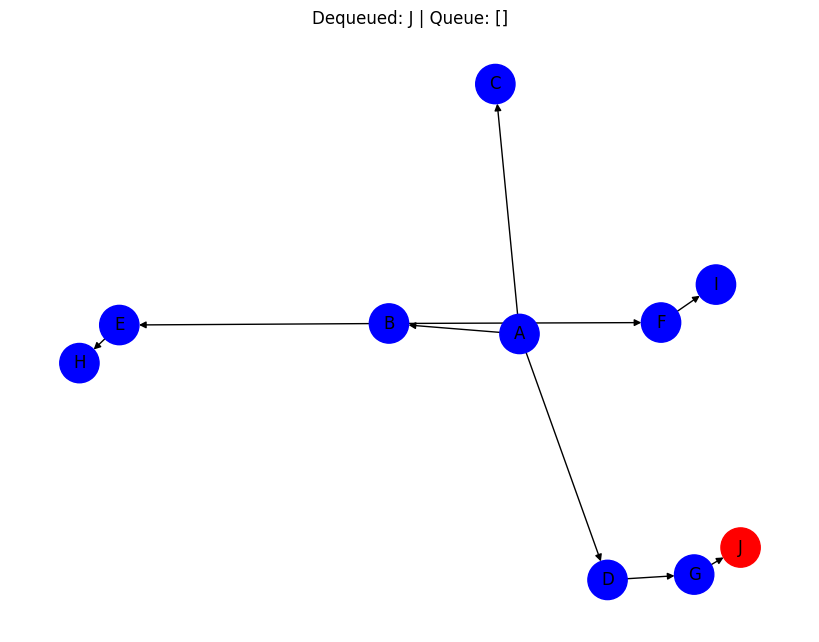


Shortest Path: A → D → G → J


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

def draw_graph(G, visited, queue, current):
    plt.figure(figsize=(8, 6))

    pos = nx.spring_layout(G)  # Layout for visualization

    # Assign colors
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')  # Current node being dequeued
        elif node in queue:
            node_colors.append('green')  # Nodes in queue (frontier)
        elif node in visited:
            node_colors.append('blue')  # Visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes

    # Draw the graph with colors
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color='black', font_size=12)
    plt.title(f"Dequeued: {current} | Queue: {list(queue)}")
    plt.show()
    time.sleep(1)  # Pause to view the step

def bfs_visualize(G, start, goal):
    queue = deque([start])  # BFS queue
    visited = set([start])  # Visited set
    parent = {start: None}  # Parent dictionary for path reconstruction

    draw_graph(G, visited, queue, None)  # Initial state

    while queue:
        current = queue.popleft()
        draw_graph(G, visited, queue, current)  # Draw after dequeuing

        if current == goal:
            return reconstruct_path(parent, goal)

        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
                draw_graph(G, visited, queue, current)  # Draw after adding neighbors

    return None  # Goal not found

def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Create a directed graph
G = nx.DiGraph()
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'E'), ('B', 'F'),
    ('D', 'G'),
    ('E', 'H'),
    ('F', 'I'),
    ('G', 'J')
]
G.add_edges_from(edges)

# Start and Goal Nodes
start_node = 'A'
goal_node = 'J'

# Run BFS with Visualization
path = bfs_visualize(G, start_node, goal_node)

# Display the final shortest path
if path:
    print("\nShortest Path:", " → ".join(path))
else:
    print("\nGoal not found in the graph.")


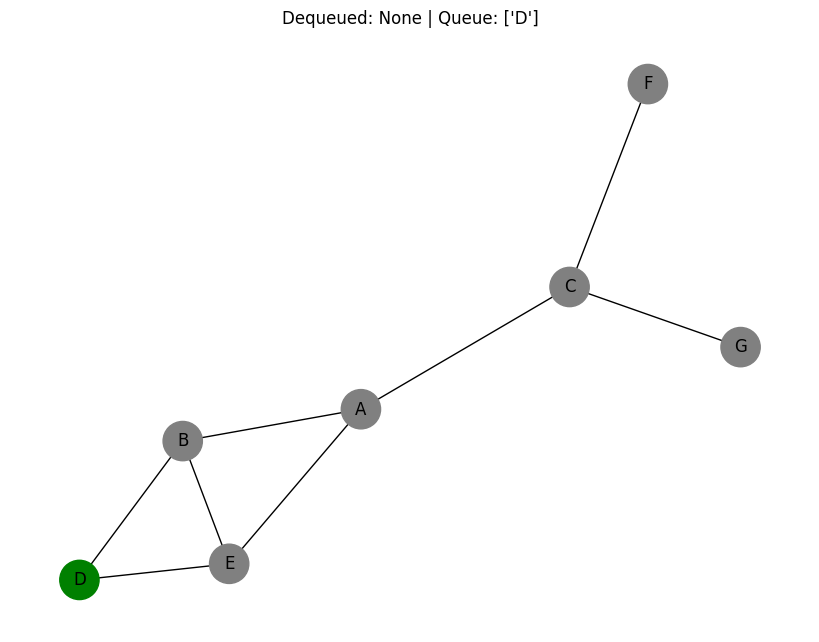

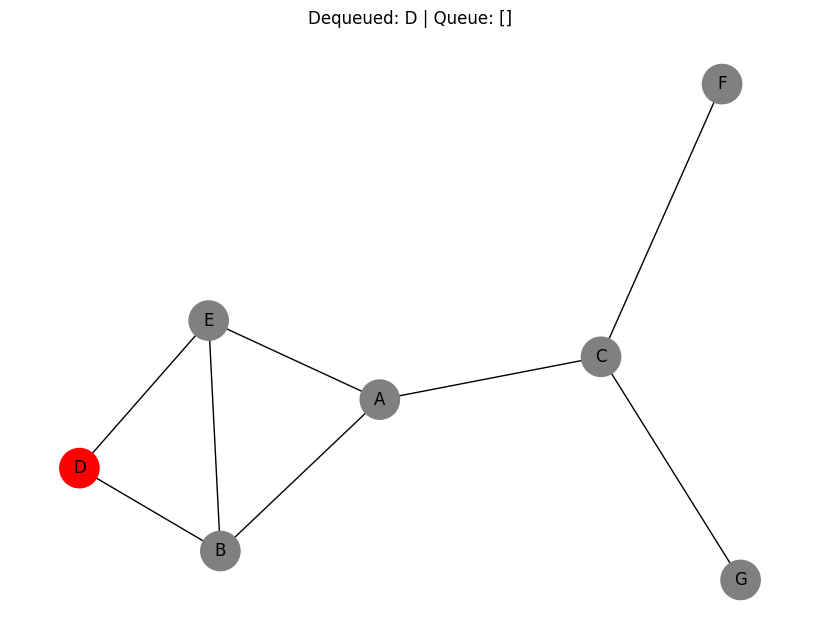

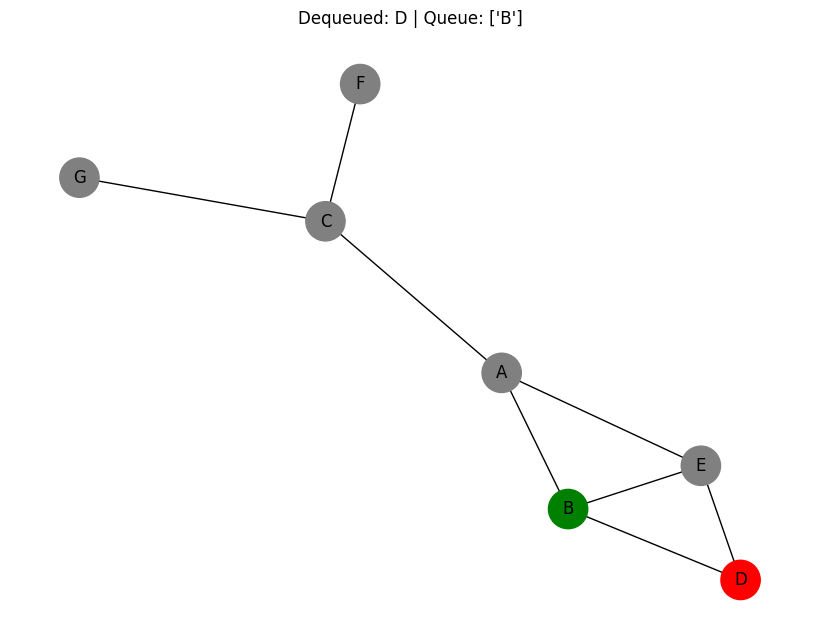

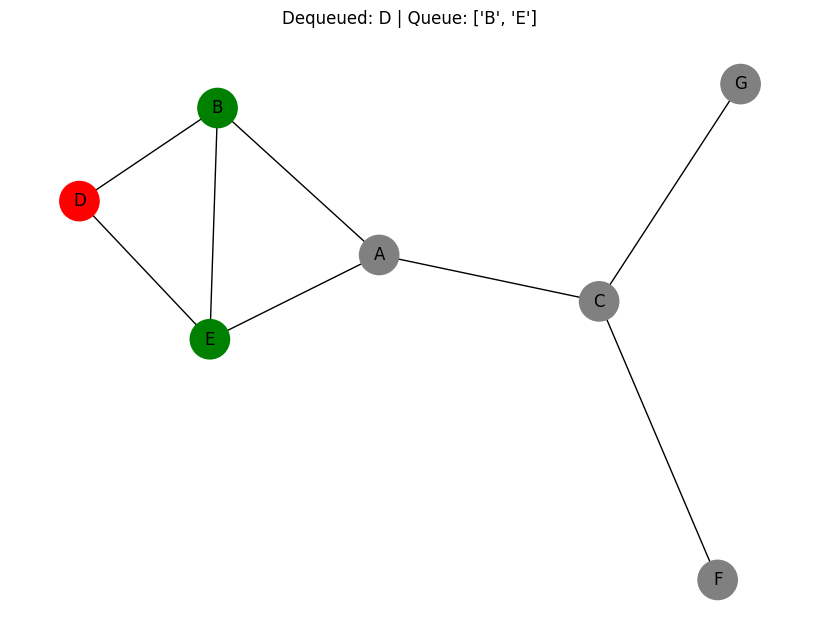

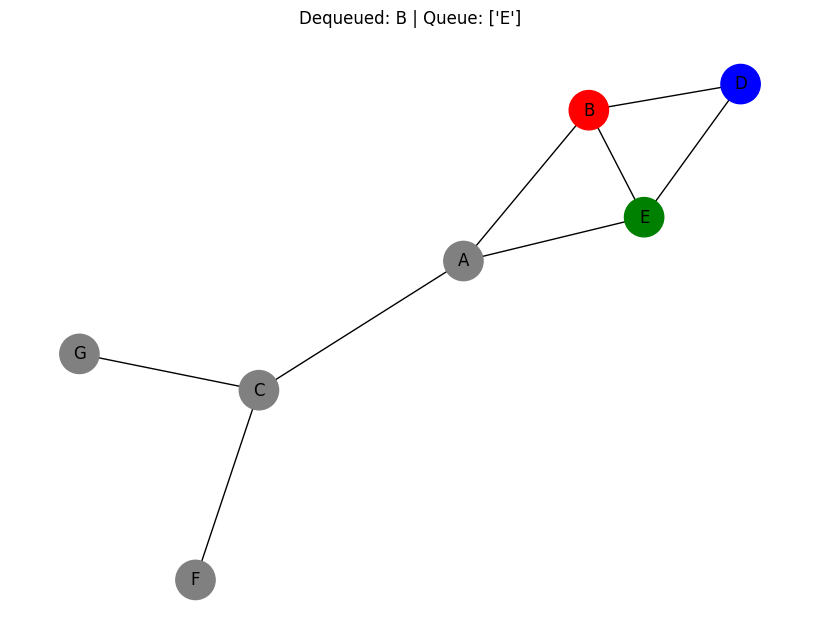

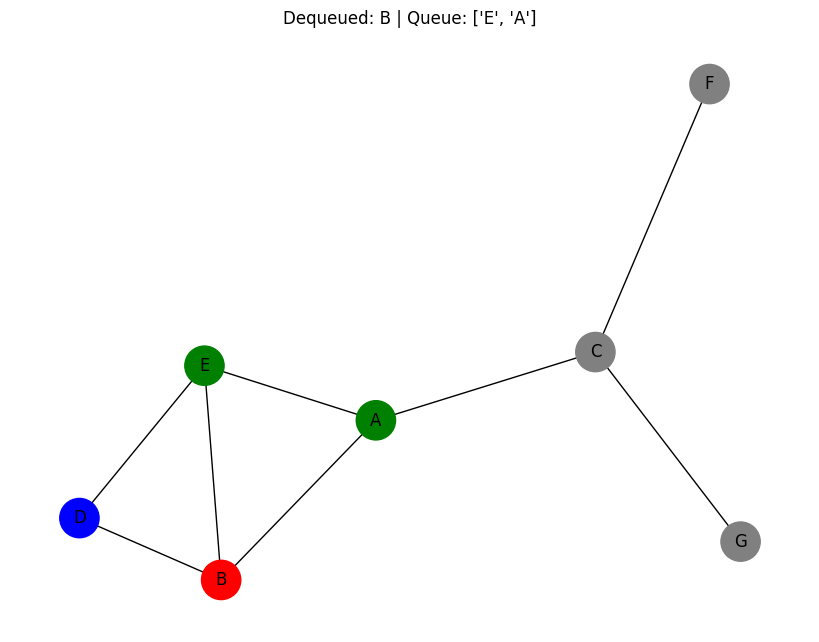

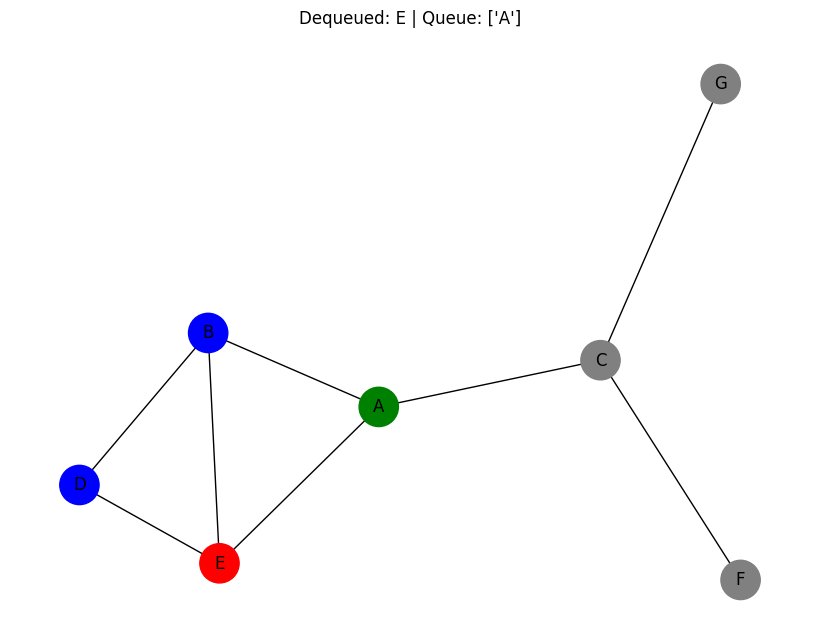

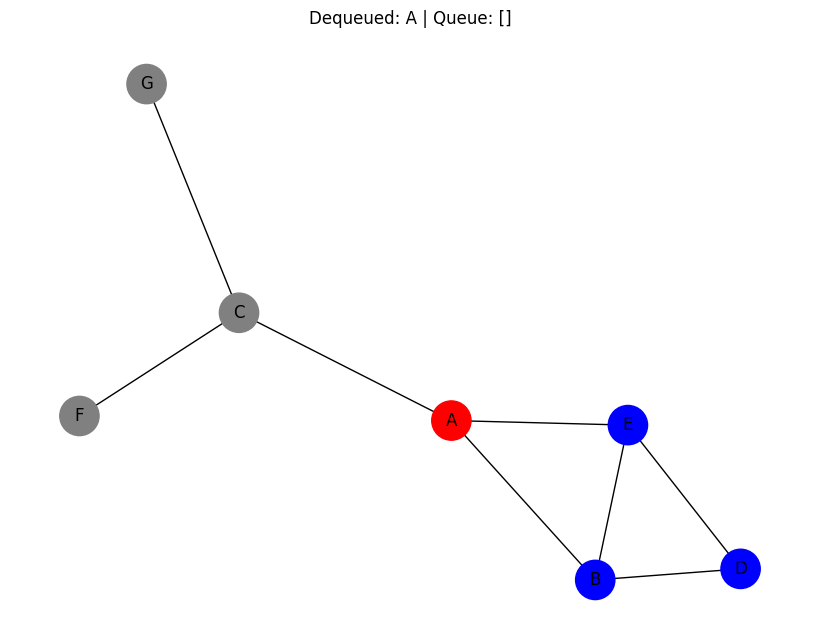

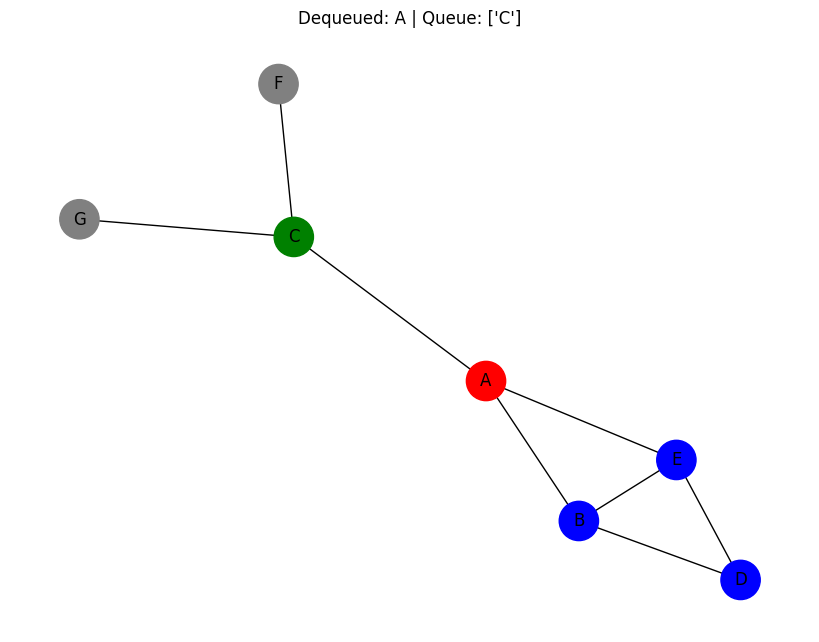

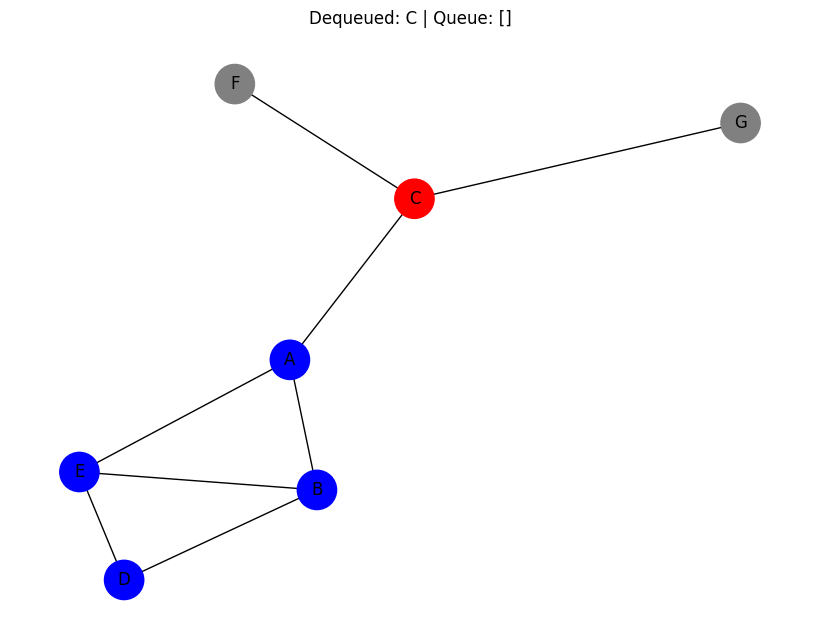

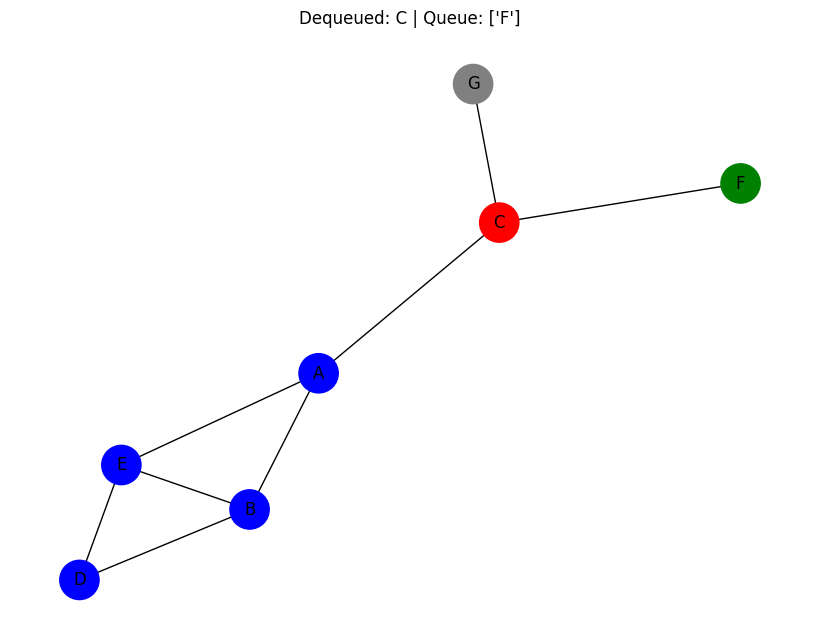

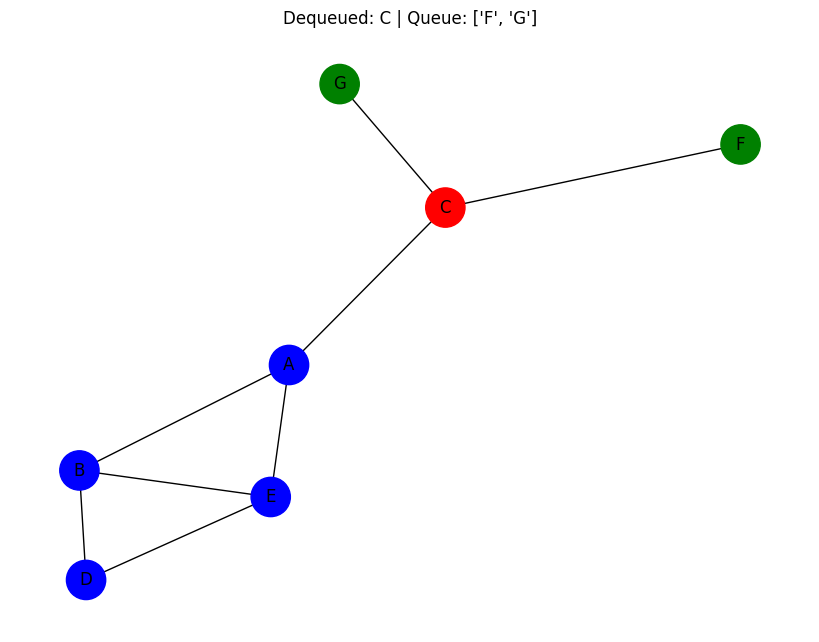

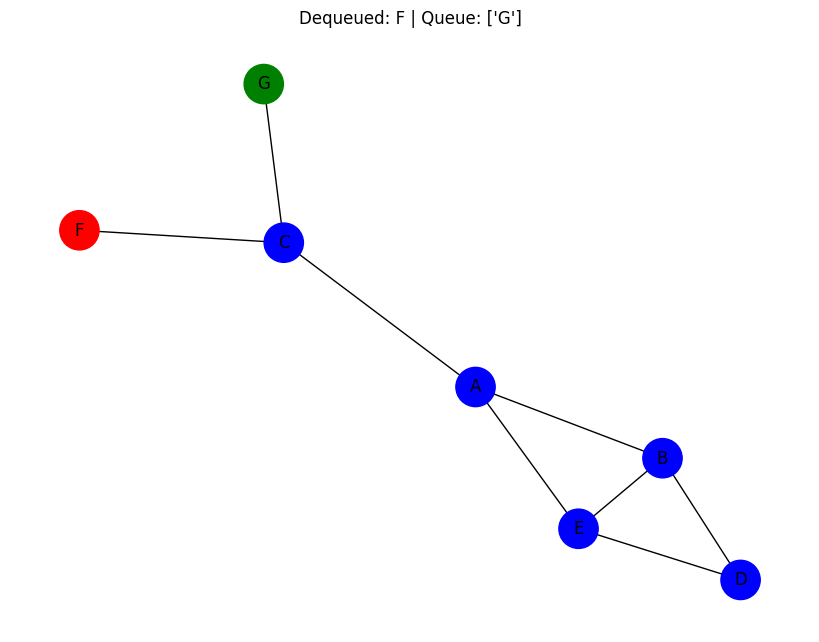


Shortest Path: D → B → A → C → F


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

def draw_graph(G, visited, queue, current):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Layout for visualization

    # Assign colors
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')  # Current node being dequeued
        elif node in queue:
            node_colors.append('green')  # Nodes in queue (frontier)
        elif node in visited:
            node_colors.append('blue')  # Visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes

    # Draw the graph with colors
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color='black', font_size=12)
    plt.title(f"Dequeued: {current} | Queue: {list(queue)}")
    plt.show()
    time.sleep(1)  # Pause to view the step

def bfs_visualize(G, start, goal):
    queue = deque([start])  # BFS queue
    visited = set([start])  # Visited set
    parent = {start: None}  # Parent dictionary for path reconstruction

    draw_graph(G, visited, queue, None)  # Initial state

    while queue:
        current = queue.popleft()
        draw_graph(G, visited, queue, current)  # Draw after dequeuing

        if current == goal:
            return reconstruct_path(parent, goal)

        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
                draw_graph(G, visited, queue, current)  # Draw after adding neighbors

    return None  # Goal not found

def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Create an **undirected** graph
G = nx.Graph()
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'E'),
    ('B', 'D'), ('B', 'E'),
    ('C', 'F'), ('C', 'G'),
    ('E', 'D')
]
G.add_edges_from(edges)

# Start and Goal Nodes
start_node = 'D'
goal_node = 'F'

# Run BFS with Visualization
path = bfs_visualize(G, start_node, goal_node)

# Display the final shortest path
if path:
    print("\nShortest Path:", " → ".join(path))
else:
    print("\nGoal not found in the graph.")


In [6]:
from collections import deque
import time

def bfs(graph, start, goal):
    queue = deque([start])  # BFS queue
    visited = set()  # Track visited nodes
    parent = {start: None}  # Parent dictionary to reconstruct path

    while queue:
        current = queue.popleft()
        print(f"Dequeued: {current}, Queue: {list(queue)}")  # Display step

        if current == goal:
            return reconstruct_path(parent, goal)

        visited.add(current)  # Mark current node as visited

        for neighbor in graph.get(current, []):
            if neighbor not in visited and neighbor not in queue:
                parent[neighbor] = current  # Track parent for path
                queue.append(neighbor)

        time.sleep(1)  # Pause for step-by-step execution

    return None  # Goal not found

def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define the undirected graph
graph = {
    'A': ['B', 'C', 'E'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'E': ['A', 'B', 'E'],
    'D': ['B'],
    'F': ['C'],
    'G': ['C']
}

# Start and Goal Nodes
start_node = 'D'
goal_node = 'F'

# Run BFS to find the shortest path
path = bfs(graph, start_node, goal_node)

# Display the final shortest path
if path:
    print("\nShortest Path:", " → ".join(path))
else:
    print("\nGoal not found in the graph.")


Dequeued: D, Queue: []
Dequeued: B, Queue: []
Dequeued: A, Queue: ['E']
Dequeued: E, Queue: ['C']
Dequeued: C, Queue: []
Dequeued: F, Queue: ['G']

Shortest Path: D → B → A → C → F


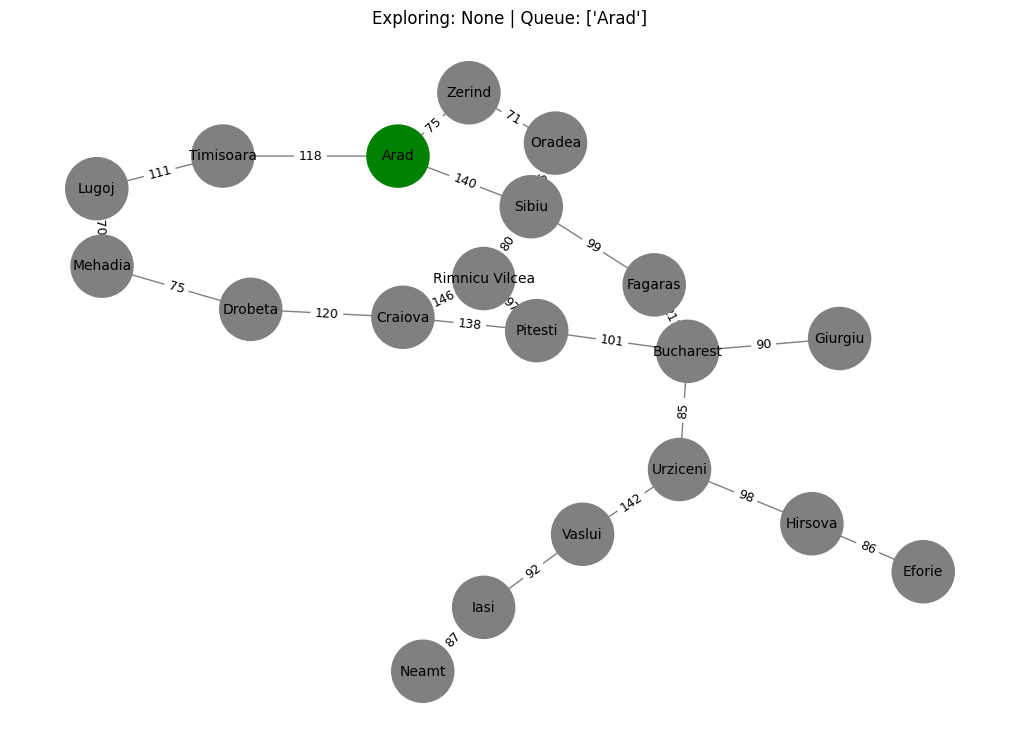

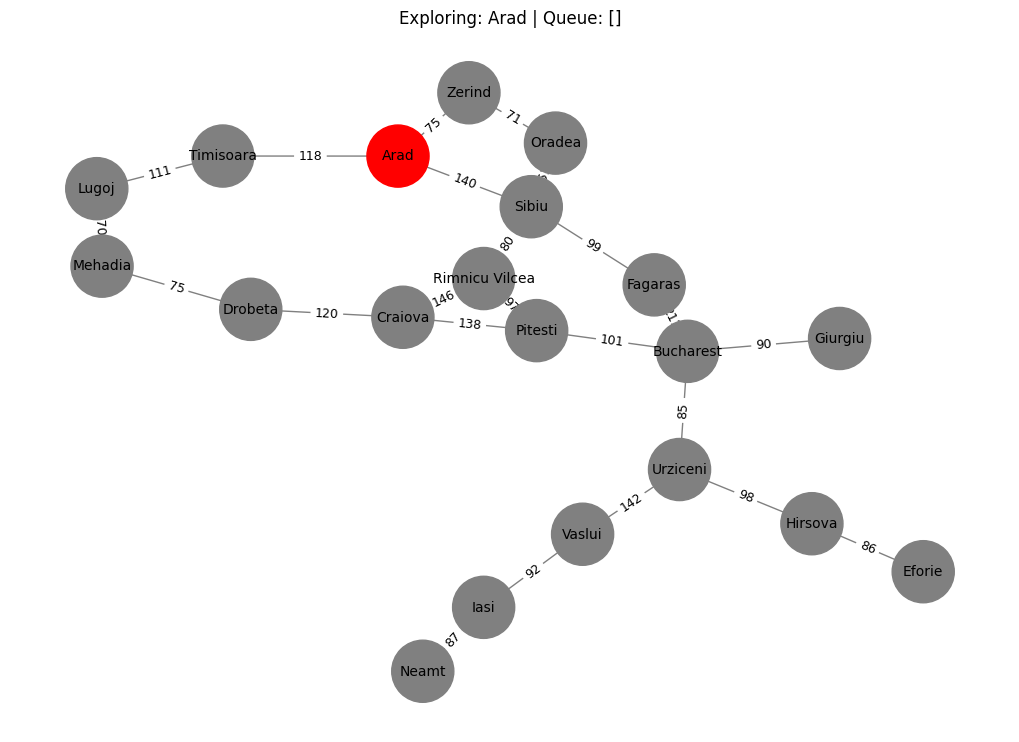

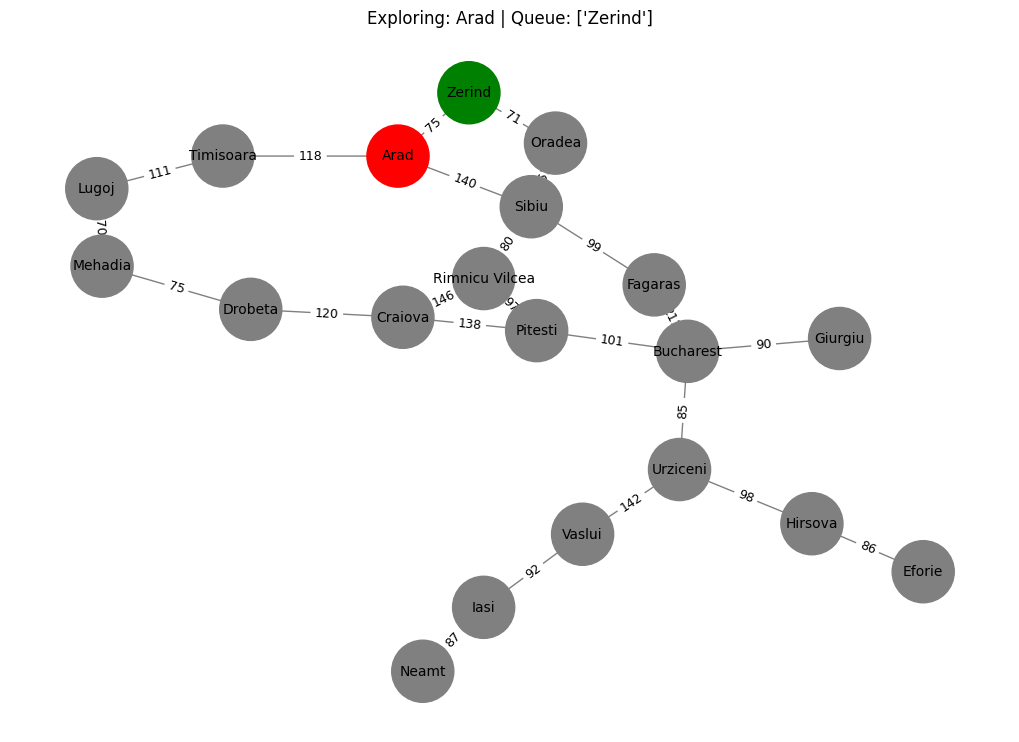

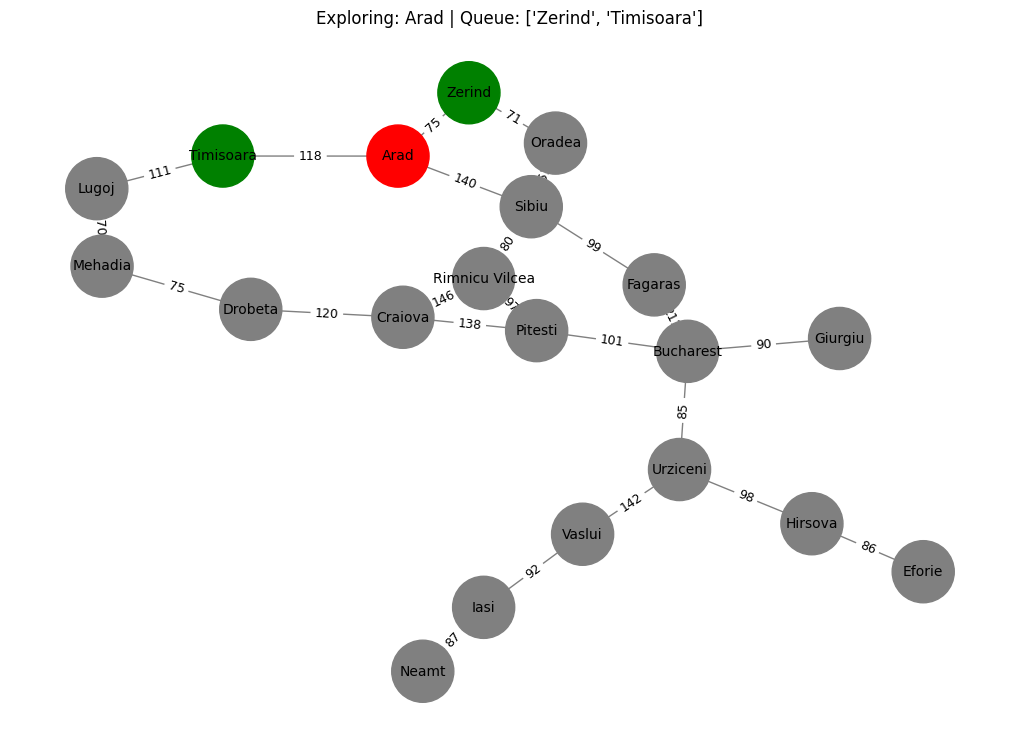

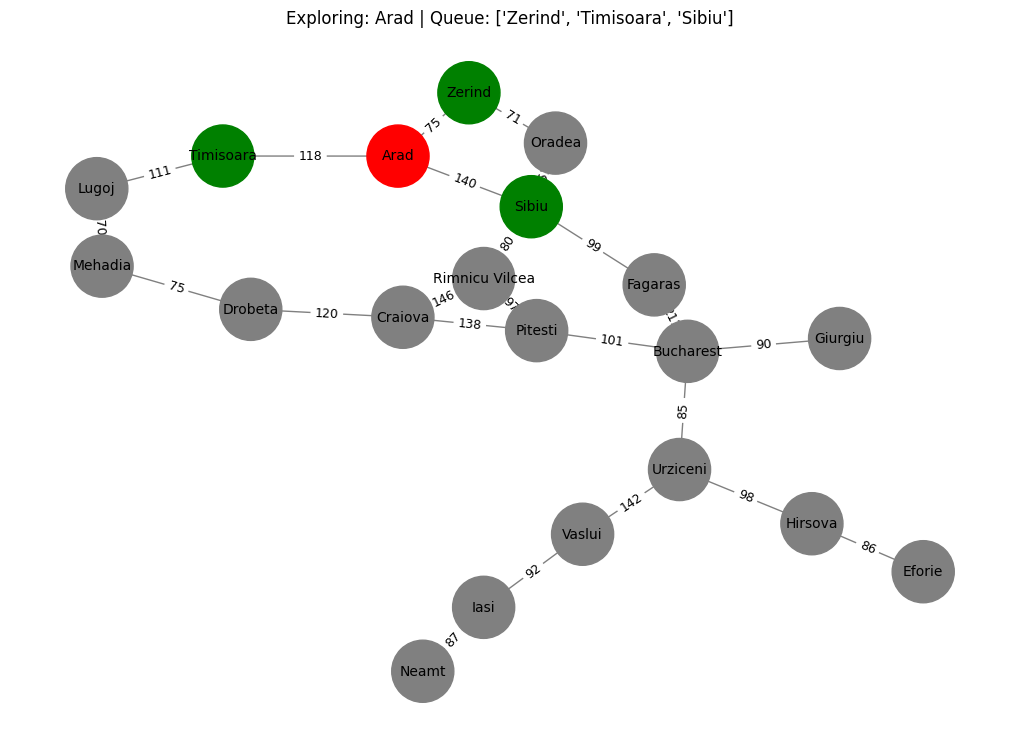

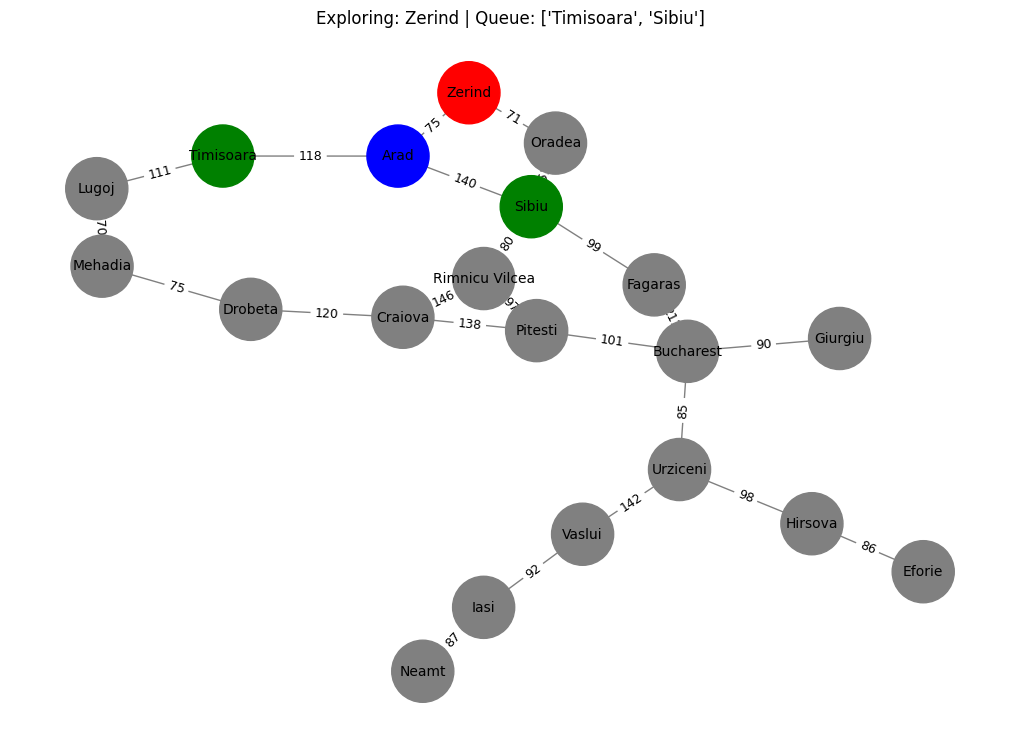

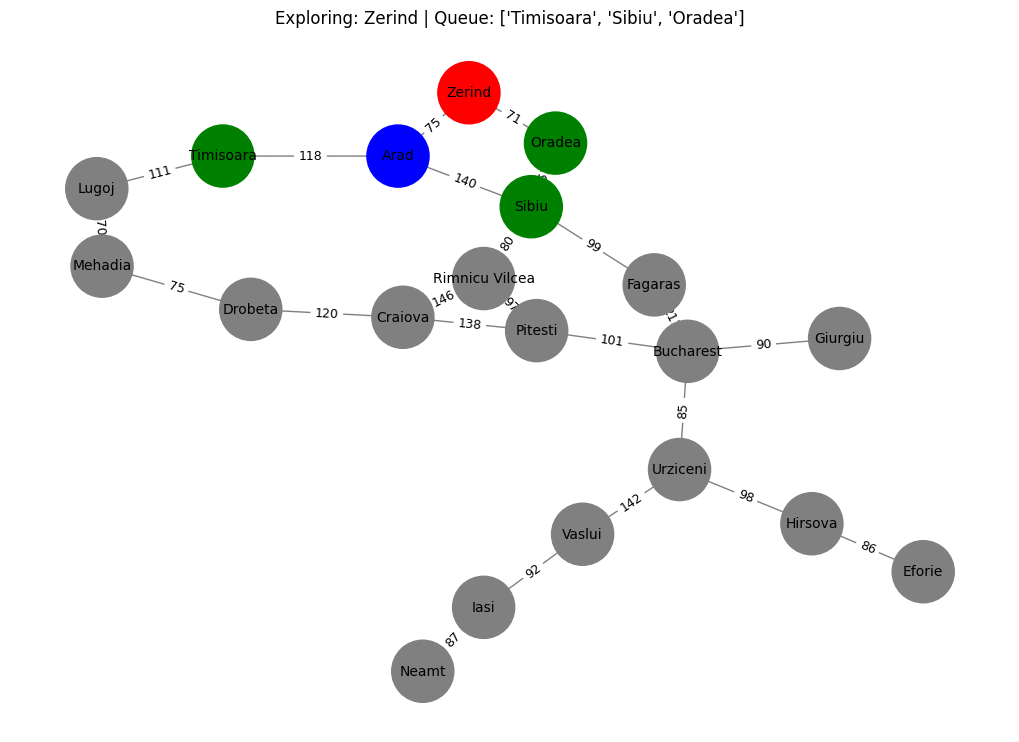

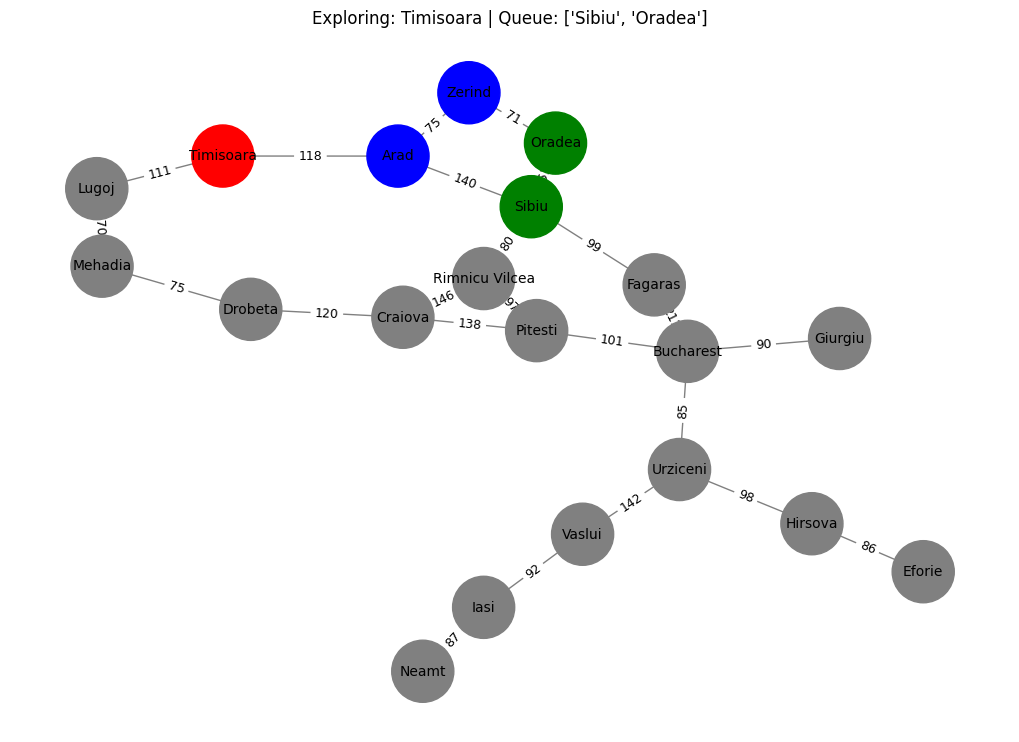

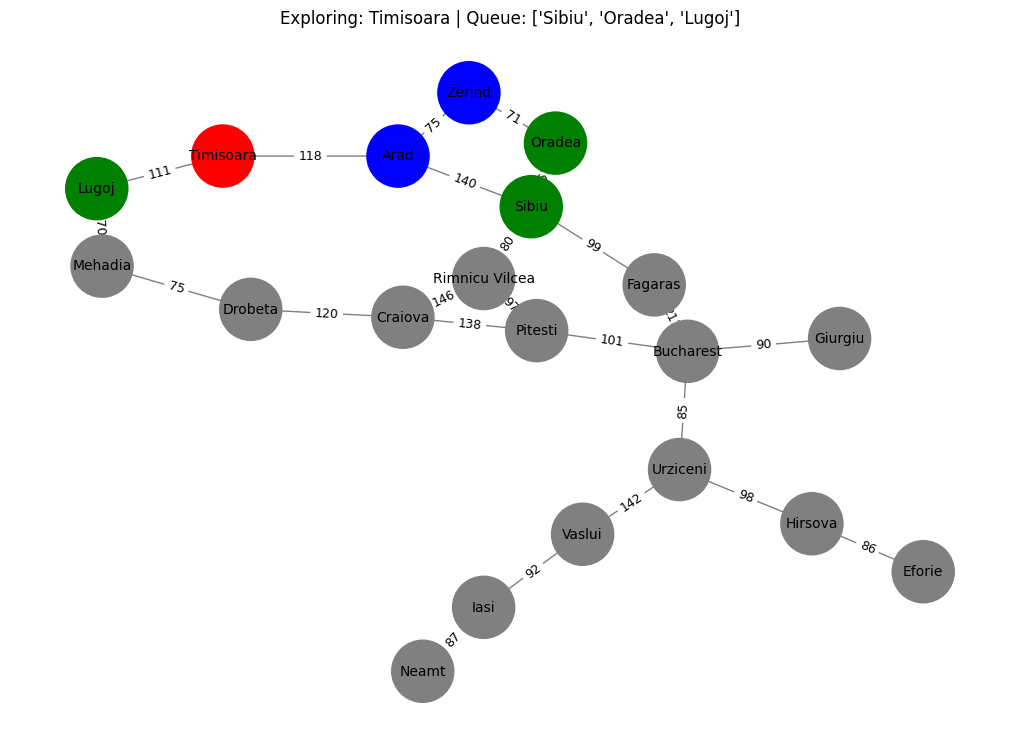

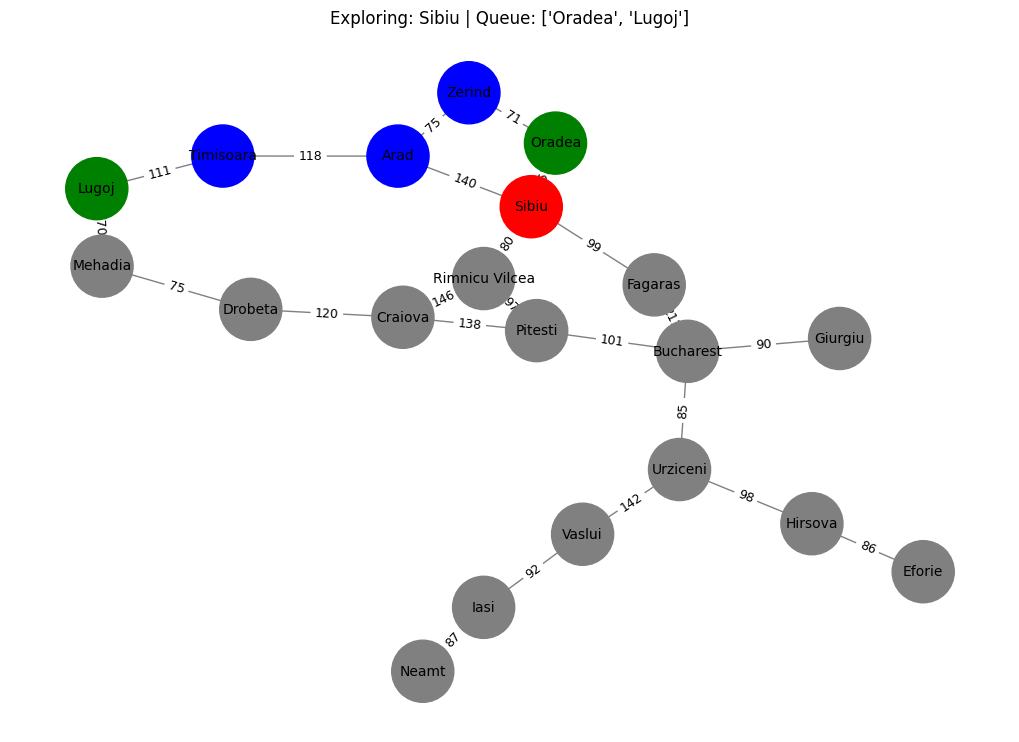

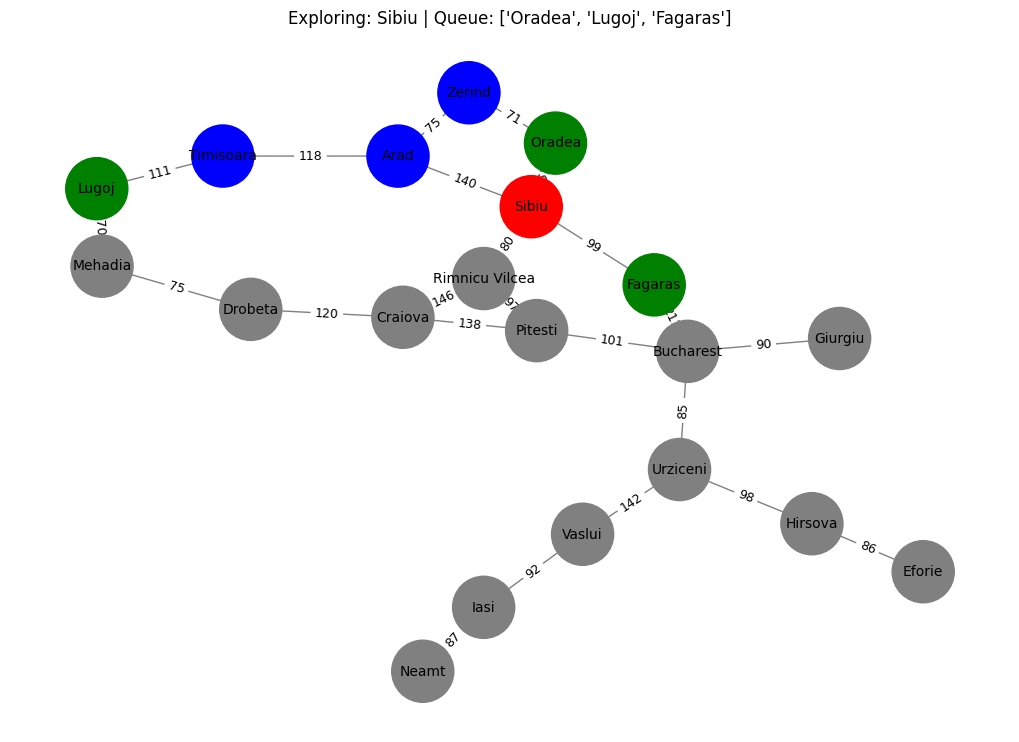

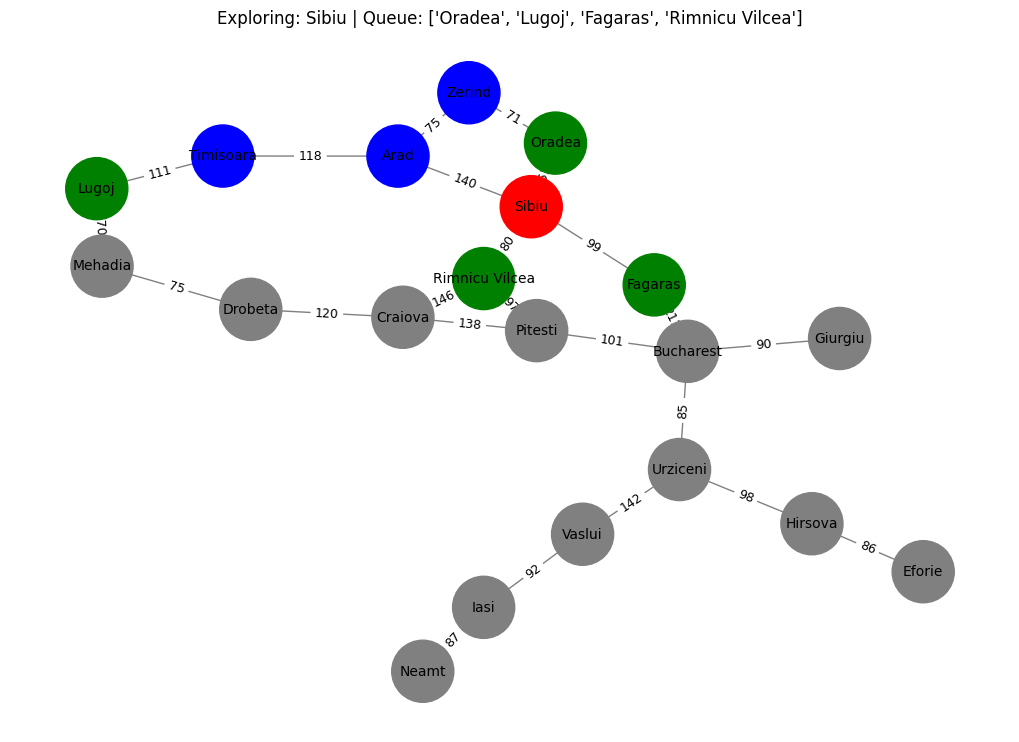

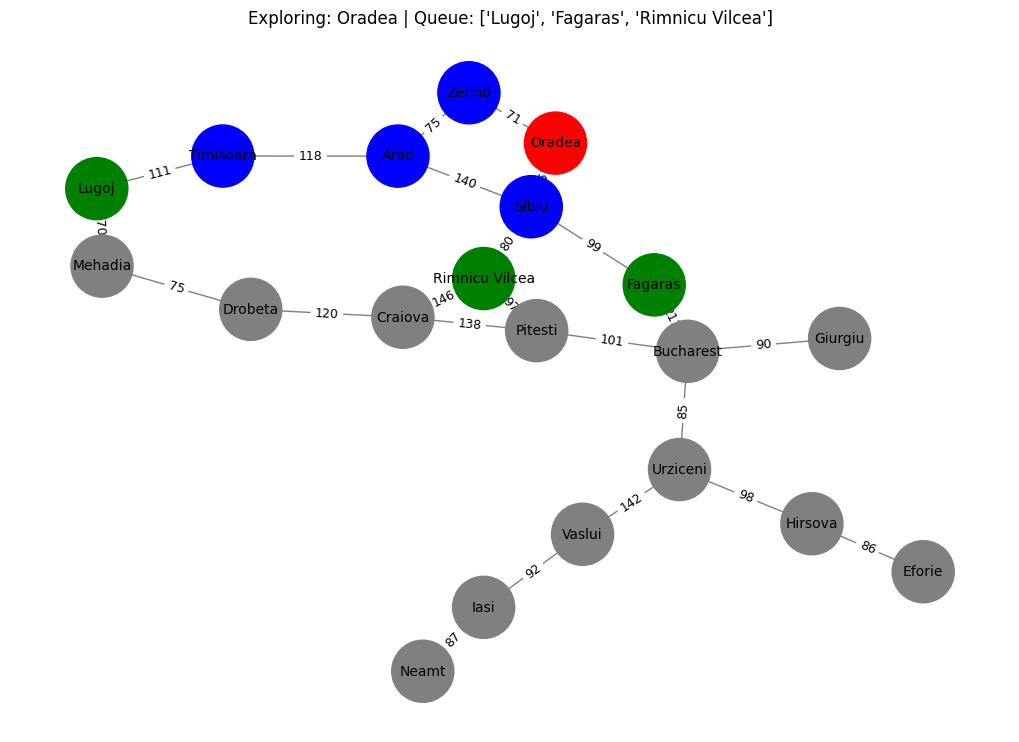

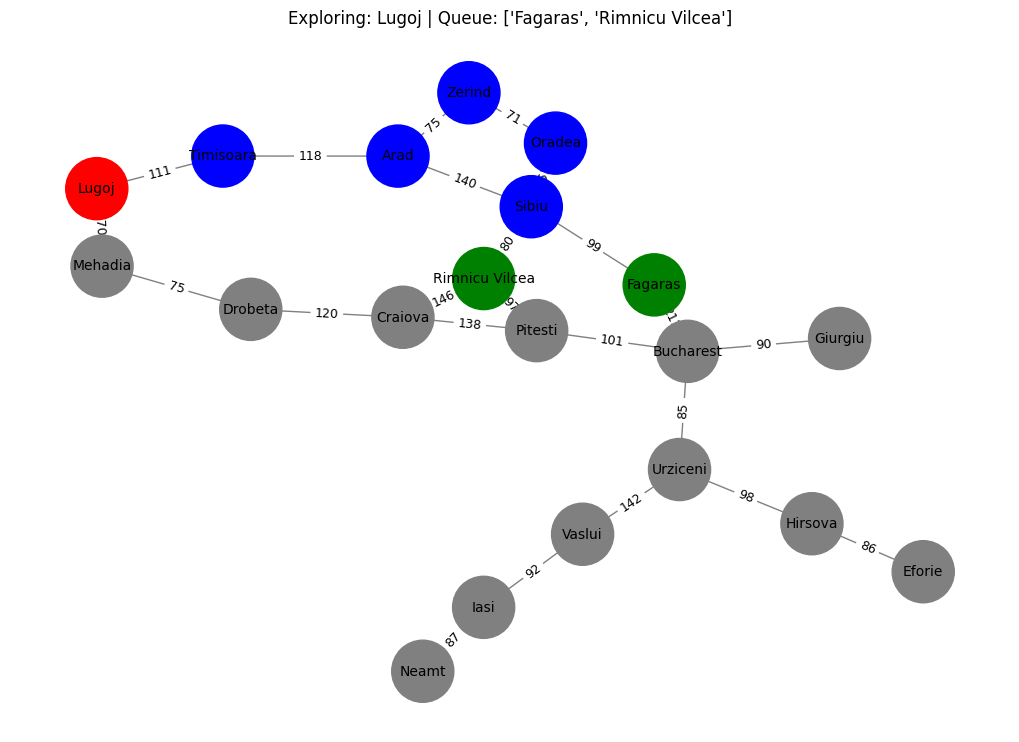

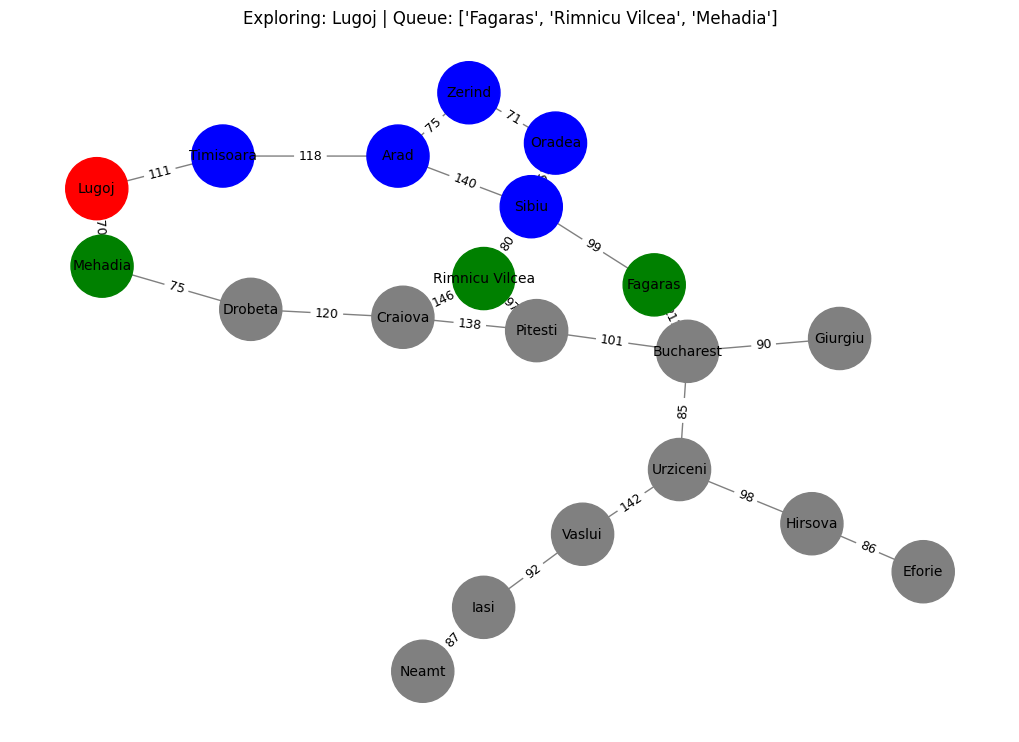

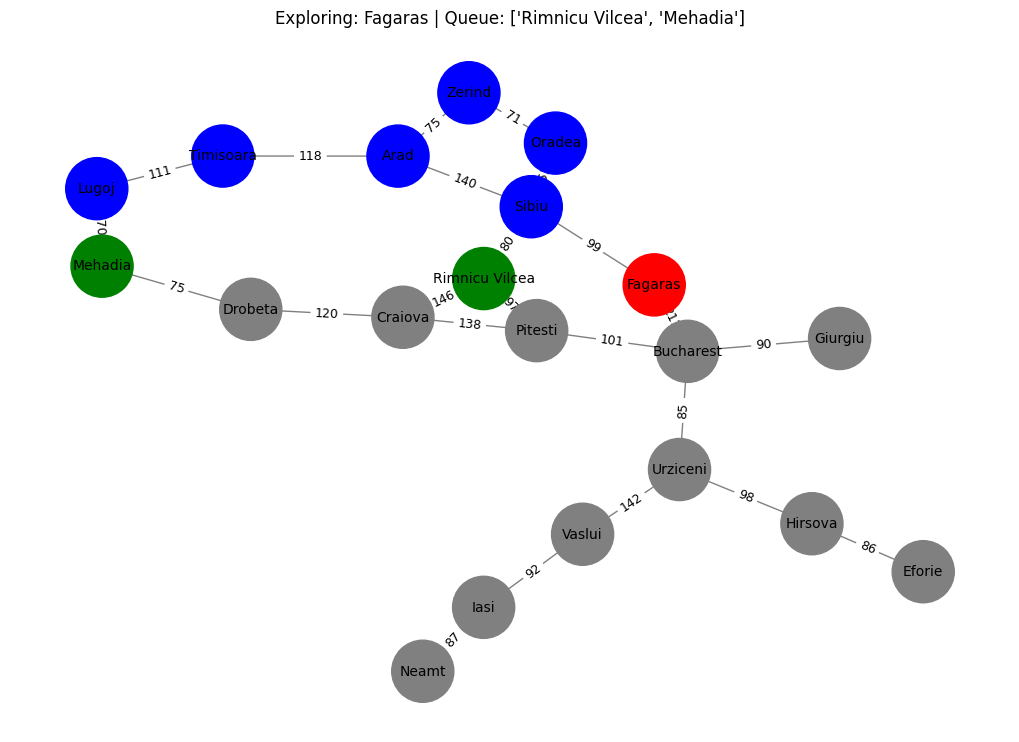

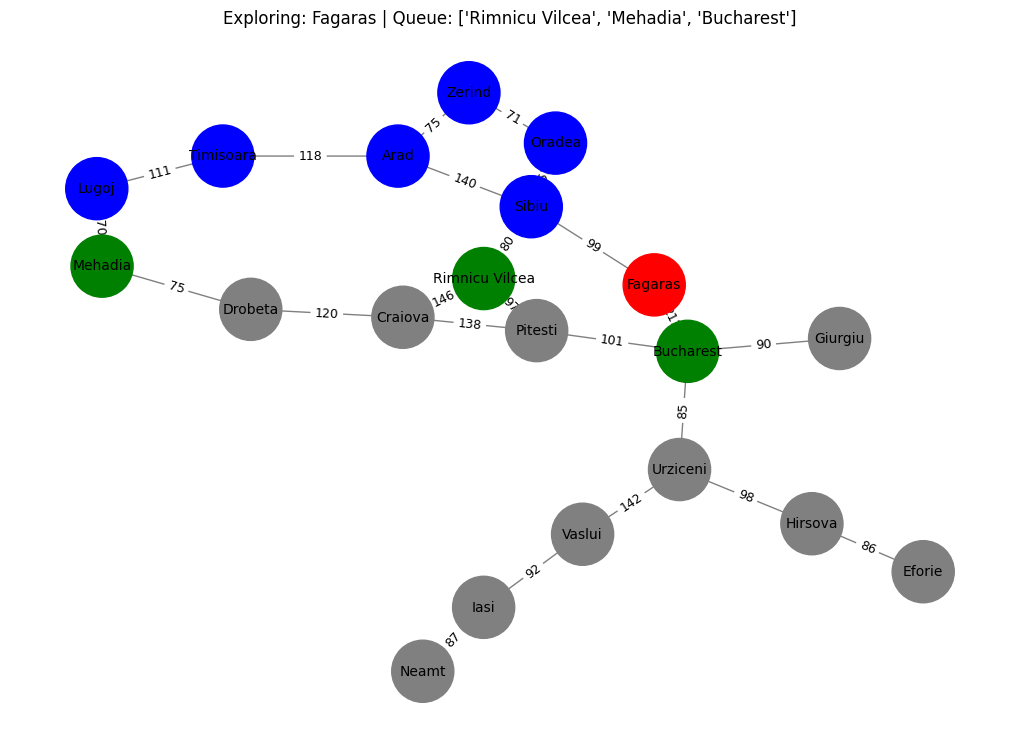

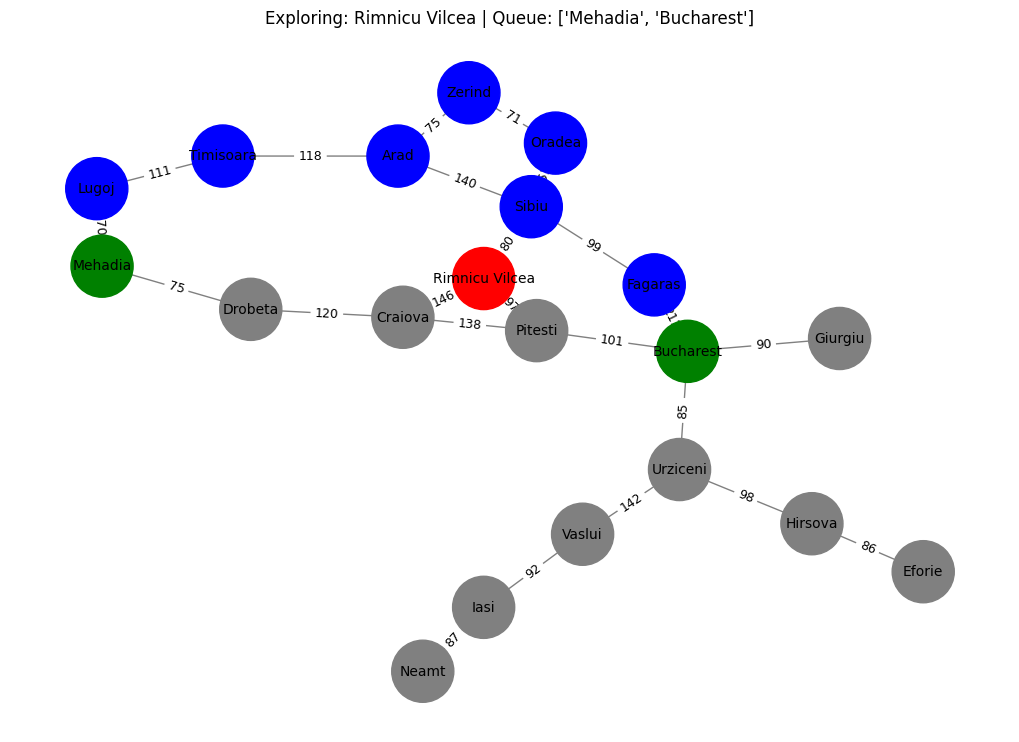

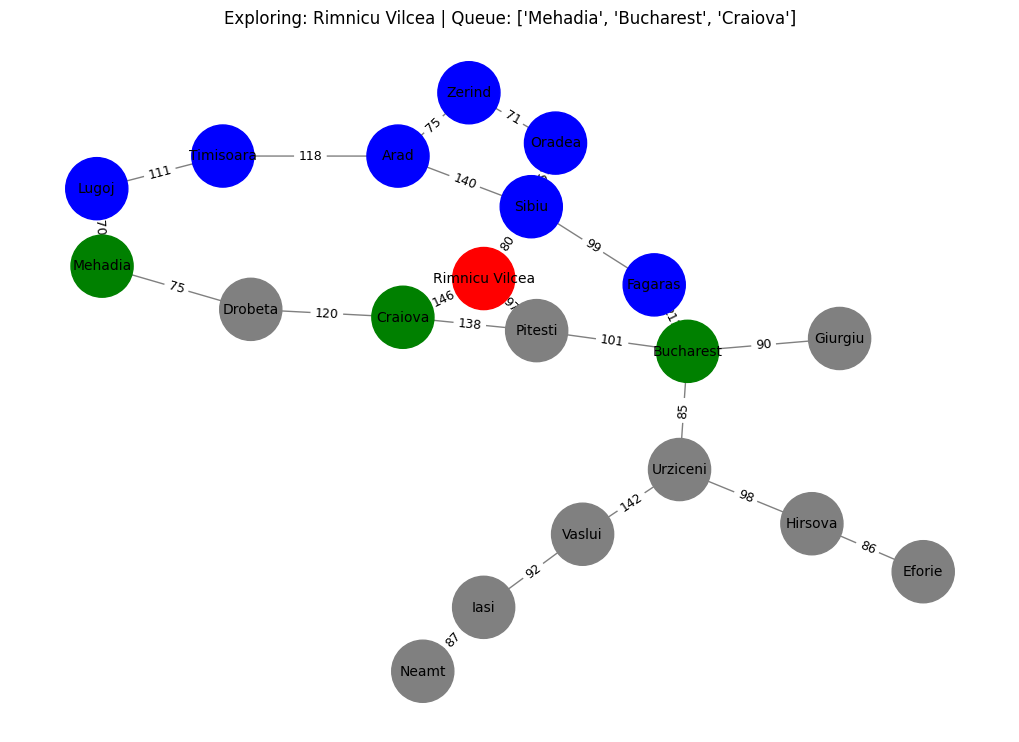

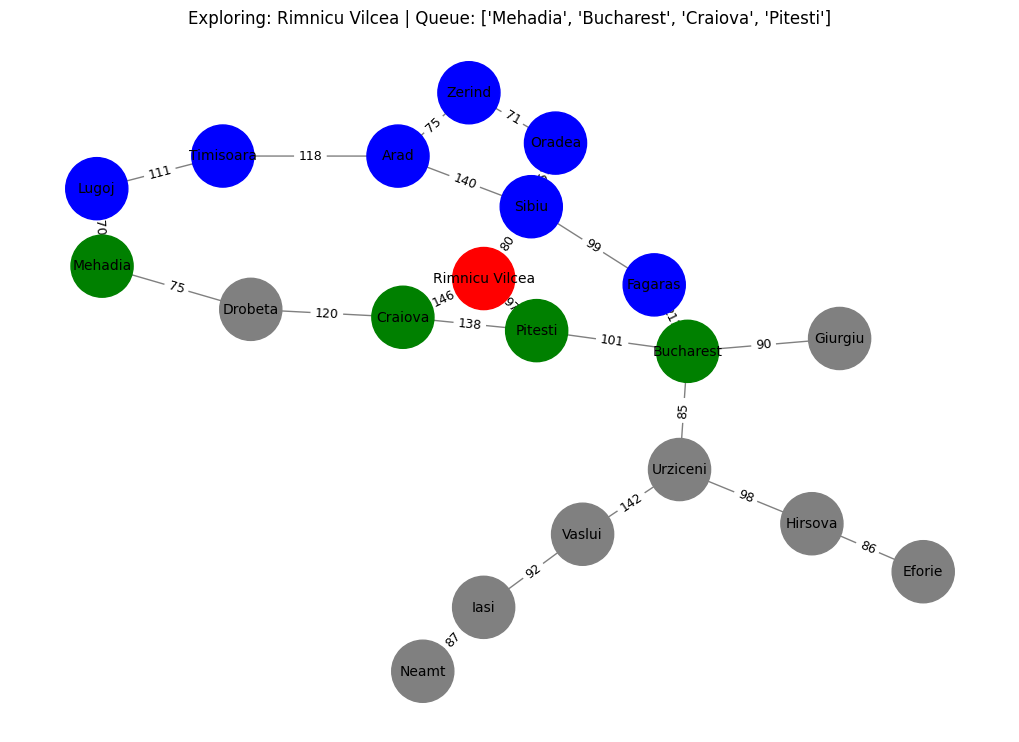

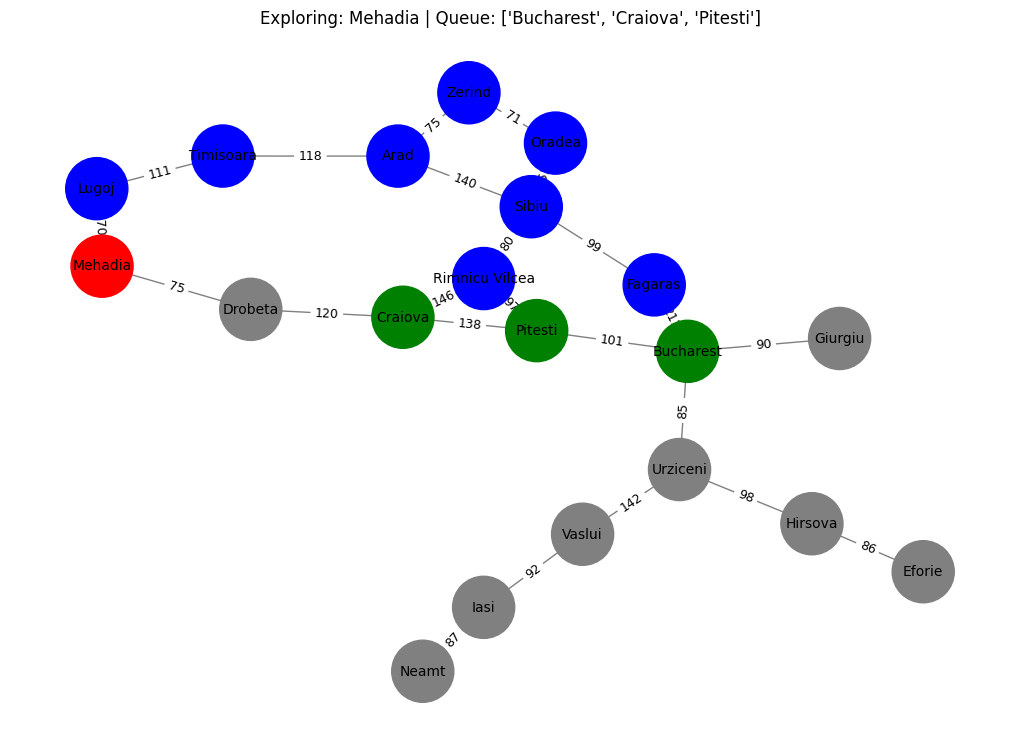

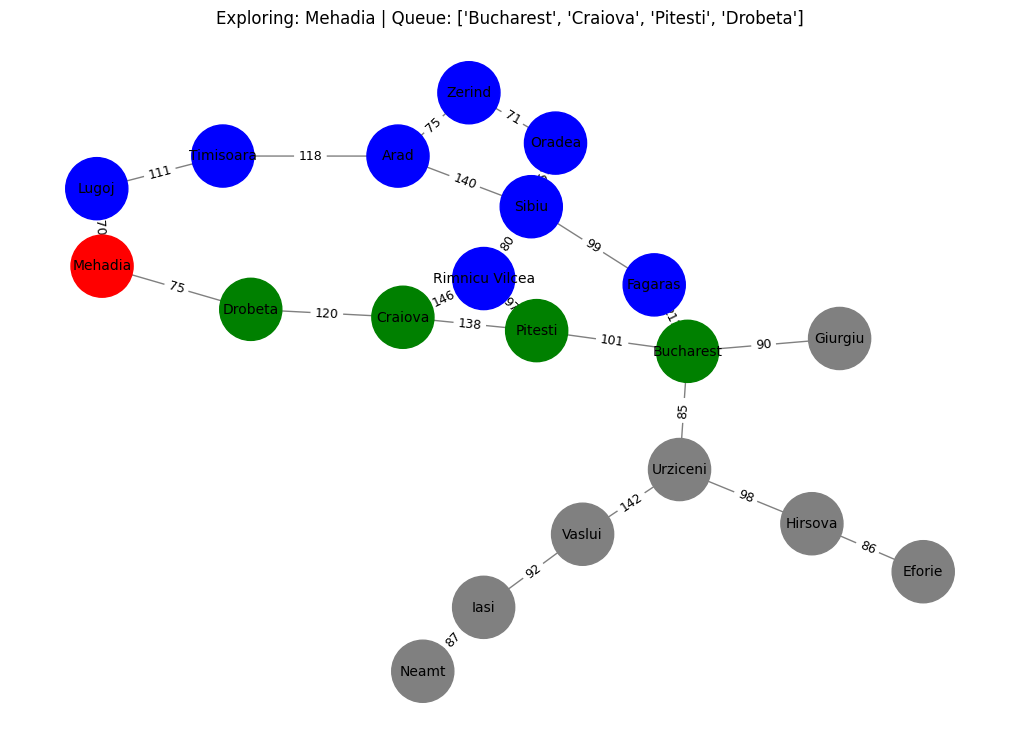

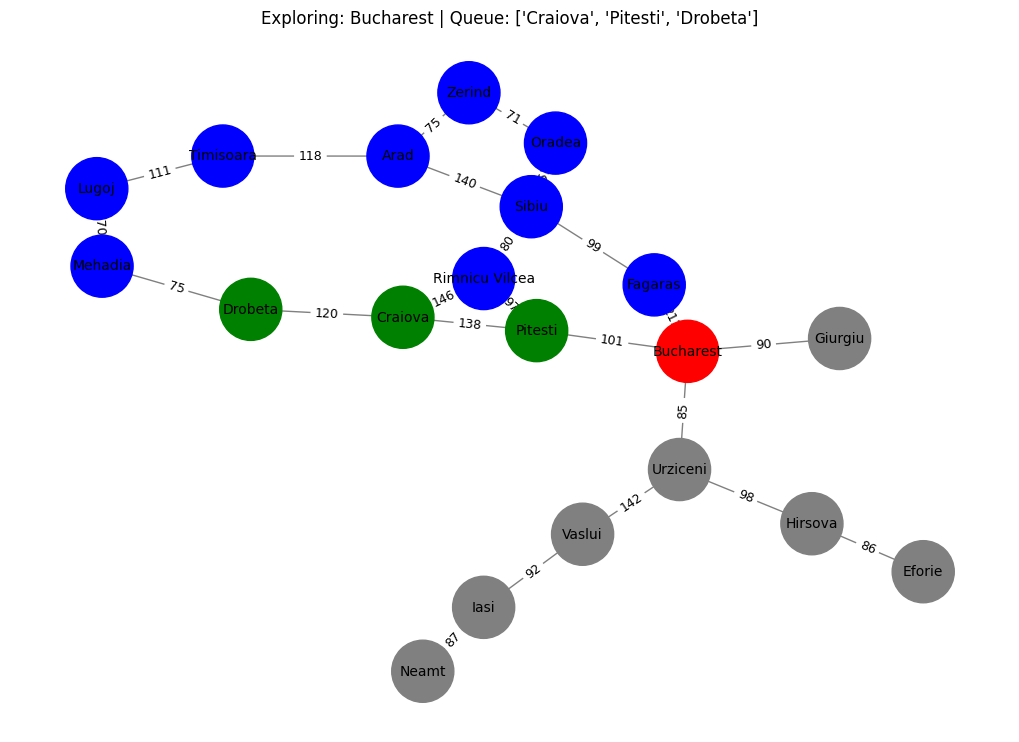

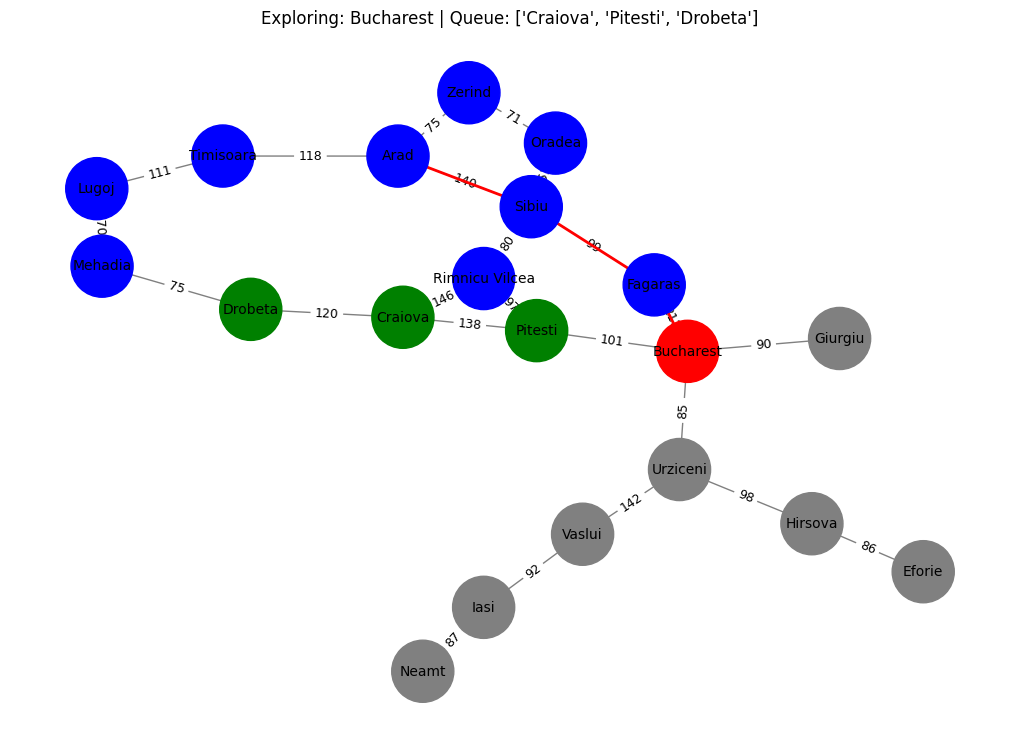


BFS Shortest Path: Arad → Sibiu → Fagaras → Bucharest


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

# Define Romania map graph with distances
romania_map = {
    'Arad': {'Zerind': 75, 'Timisoara': 118, 'Sibiu': 140},
    'Zerind': {'Arad': 75, 'Oradea': 71},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Eforie': {'Hirsova': 86},
    'Vaslui': {'Urziceni': 142, 'Iasi': 92},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Neamt': {'Iasi': 87}
}

# Create an undirected NetworkX graph
G = nx.Graph()

# Add edges with weights
for city, neighbors in romania_map.items():
    for neighbor, distance in neighbors.items():
        G.add_edge(city, neighbor, weight=distance)

# Function to draw the graph with step-by-step BFS progress
def draw_graph(G, visited, queue, current, path=None):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42)  # Layout positioning

    # Assign colors
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')  # Current node being explored
        elif node in queue:
            node_colors.append('green')  # Nodes in queue (frontier)
        elif node in visited:
            node_colors.append('blue')  # Visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes

    # Draw graph
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, edge_color="gray", font_size=10)

    # Draw edge labels (distances)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    # Highlight the shortest path in red
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

    plt.title(f"Exploring: {current} | Queue: {list(queue)}")
    plt.show()
    time.sleep(1)  # Pause for better visualization

# BFS with step-by-step visualization
def bfs_visualize(G, start, goal):
    queue = deque([start])  # BFS queue
    visited = set([start])  # Visited set
    parent = {start: None}  # Parent tracking

    draw_graph(G, visited, queue, None)  # Initial state

    while queue:
        current = queue.popleft()
        draw_graph(G, visited, queue, current)  # Draw after dequeuing

        if current == goal:
            path = reconstruct_path(parent, goal)
            draw_graph(G, visited, queue, current, path)  # Final path visualization
            return path

        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
                draw_graph(G, visited, queue, current)  # Draw after adding neighbors

    return None  # Goal not found

# Reconstruct the shortest path from parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Select start and goal cities
start_city = "Arad"
goal_city = "Bucharest"

# Run BFS with Visualization
bfs_path = bfs_visualize(G, start_city, goal_city)

# Print and visualize the final shortest path
if bfs_path:
    print("\nBFS Shortest Path:", " → ".join(bfs_path))
else:
    print("\nGoal not found in the graph.")


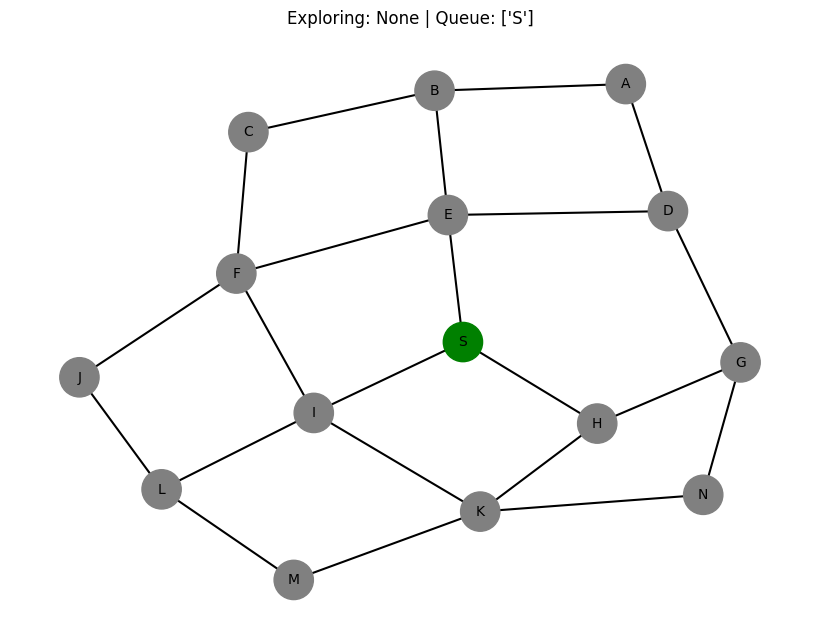

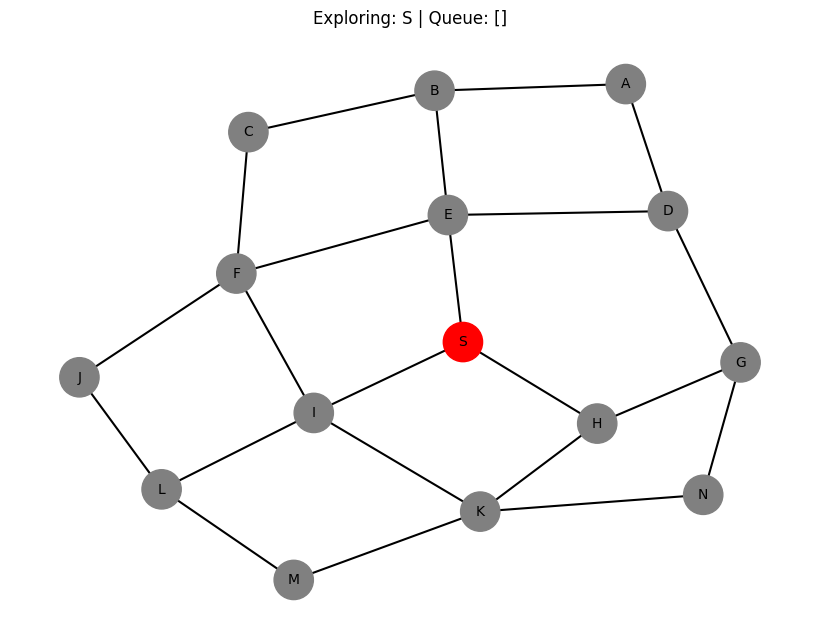

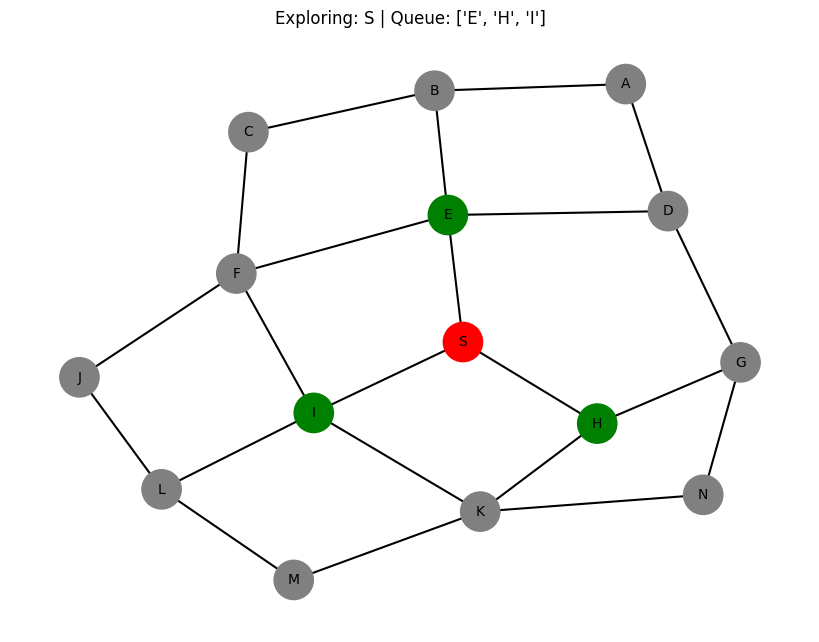

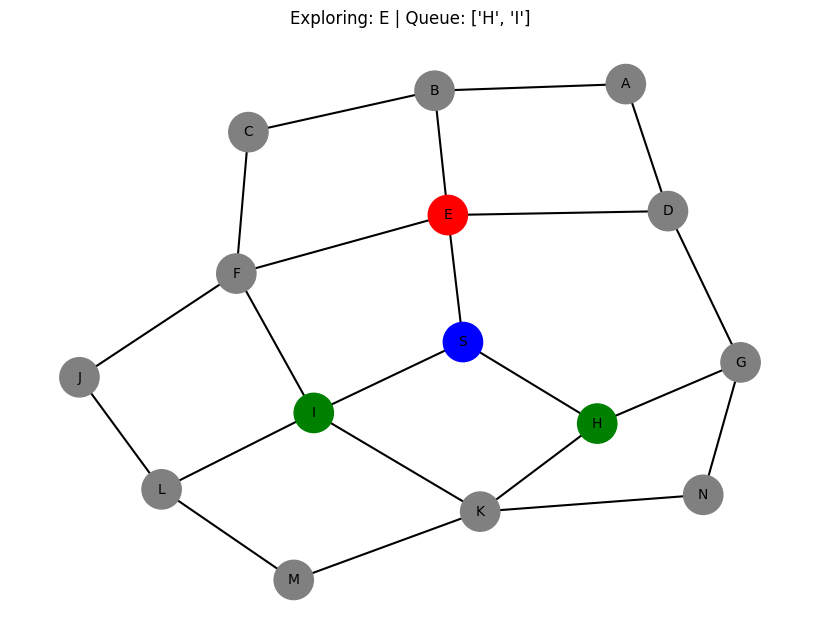

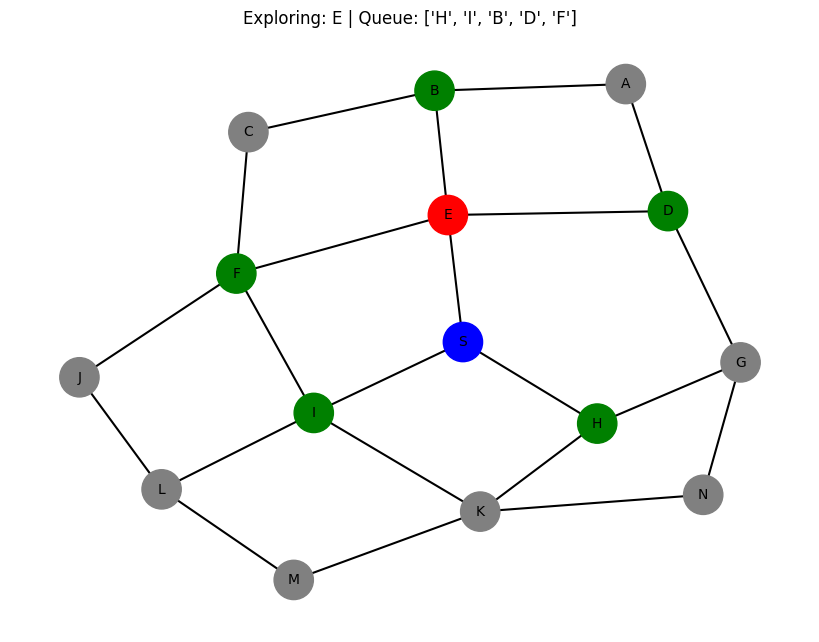

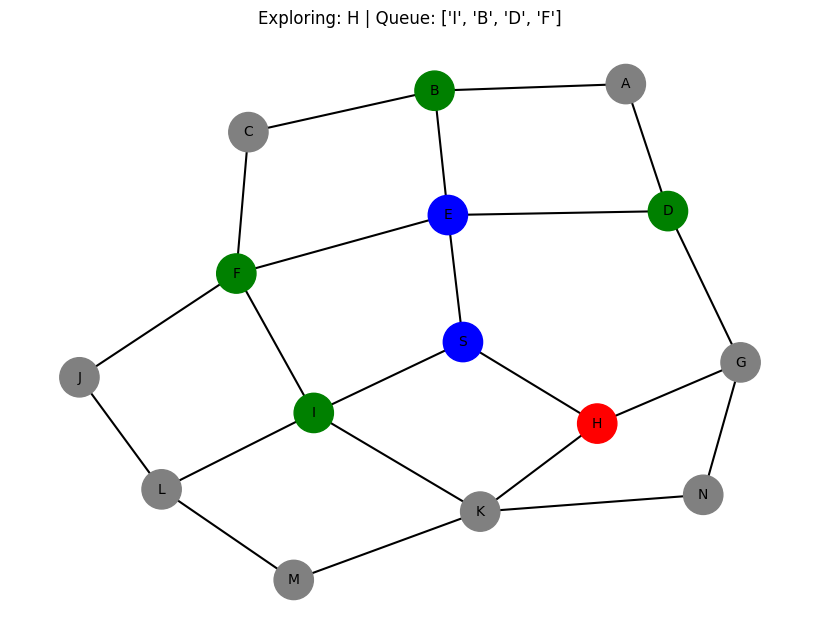

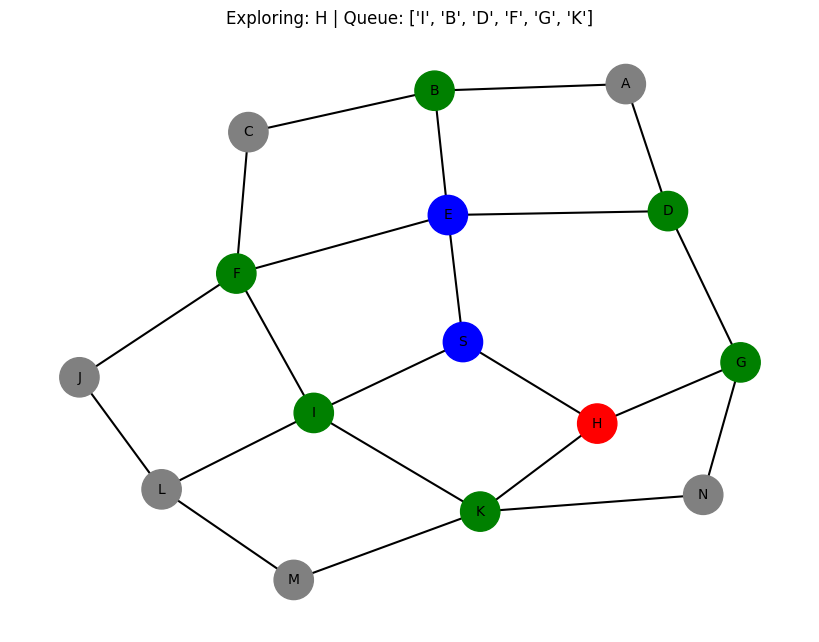

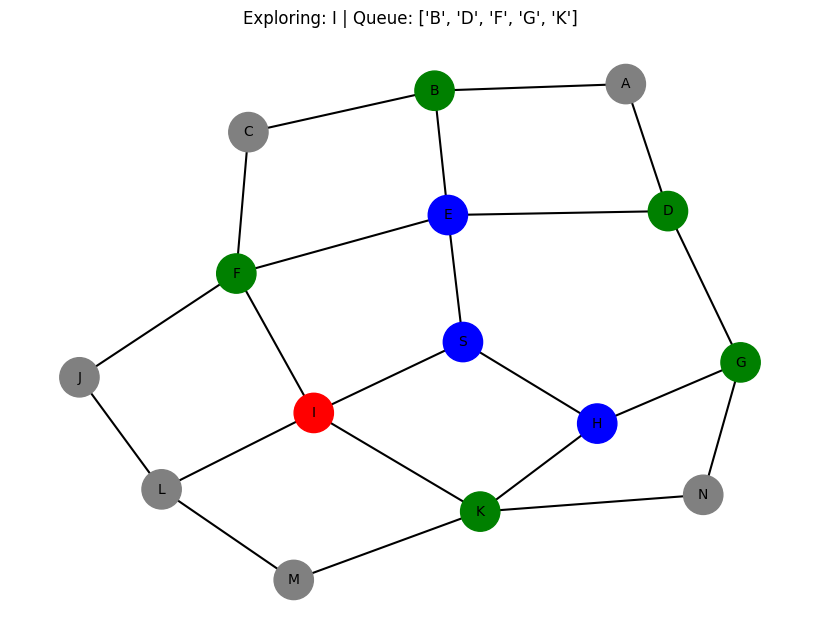

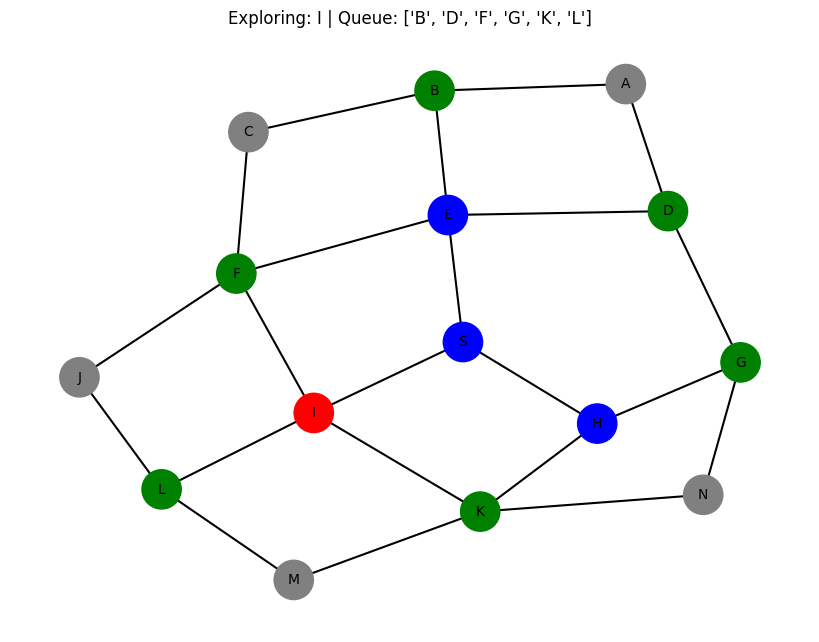

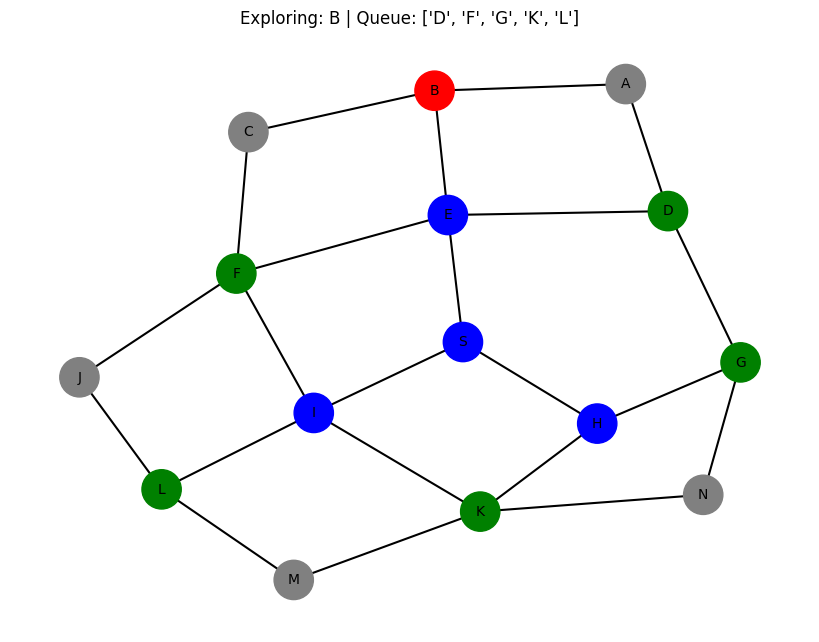

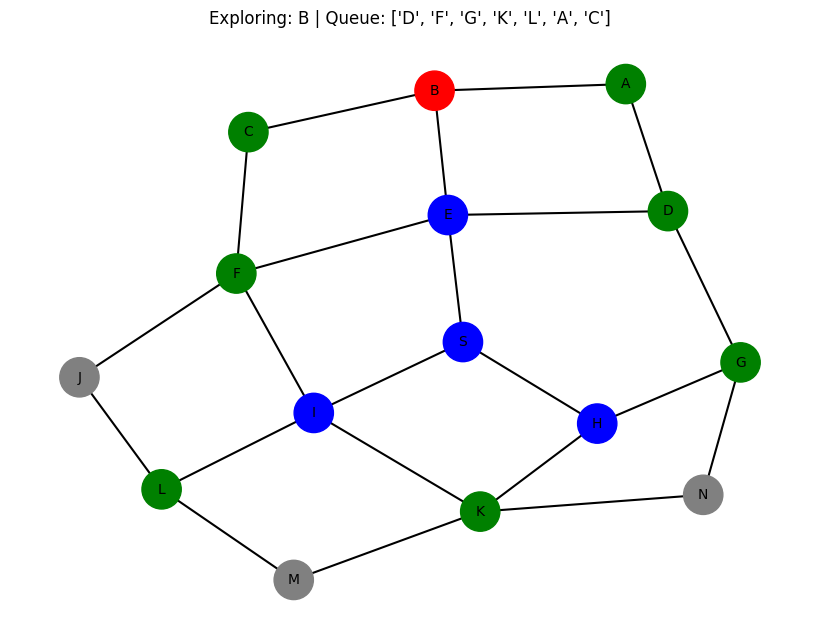

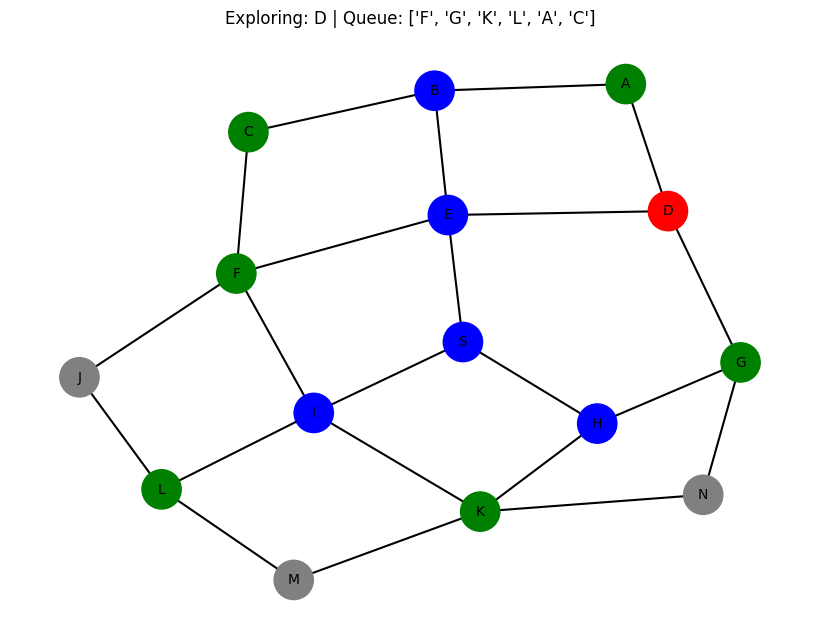

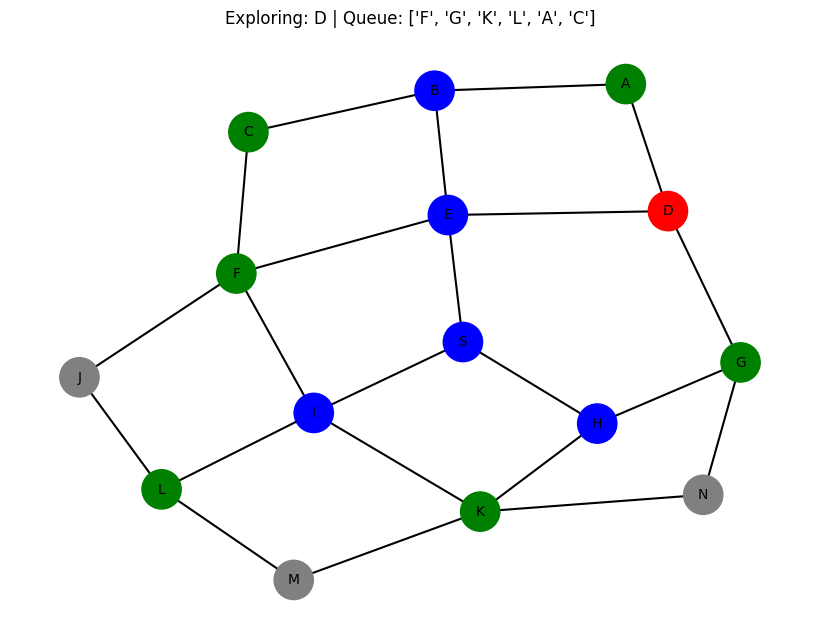

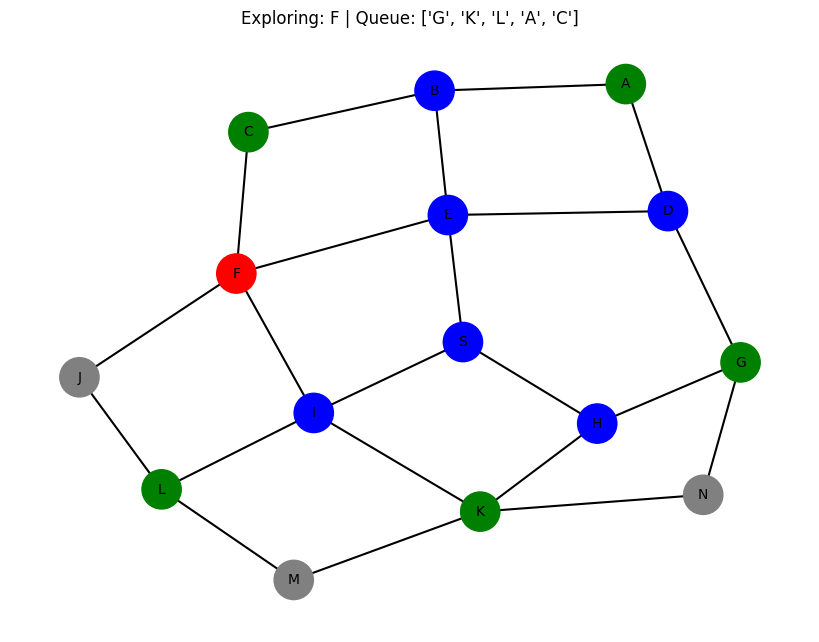

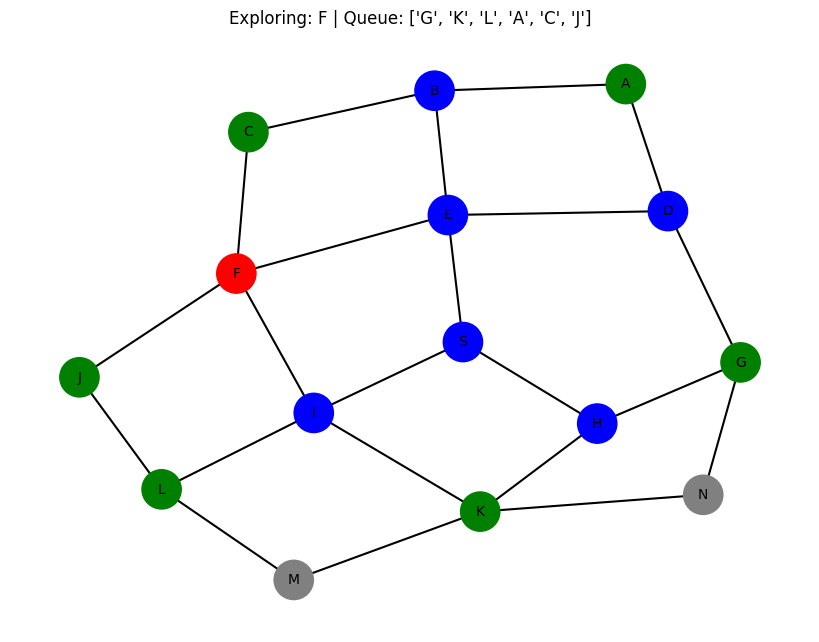

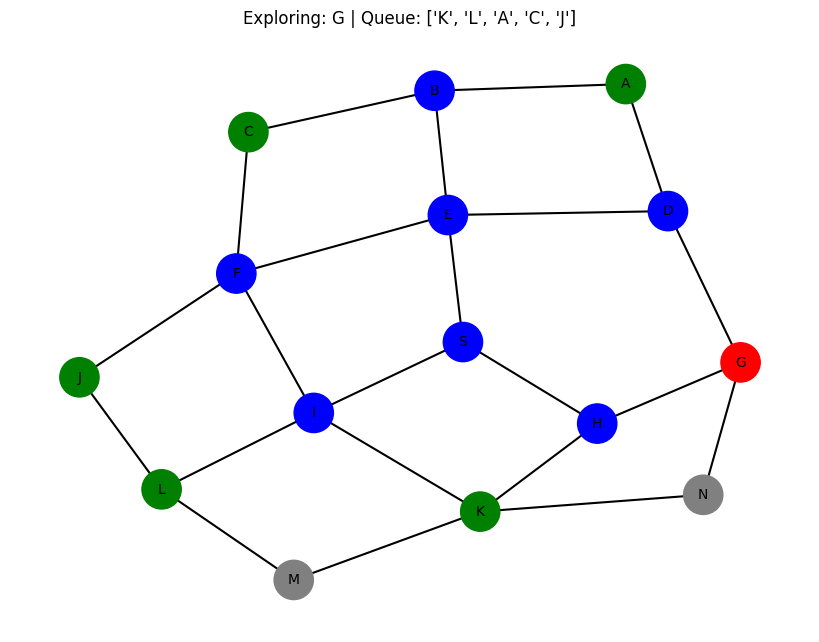

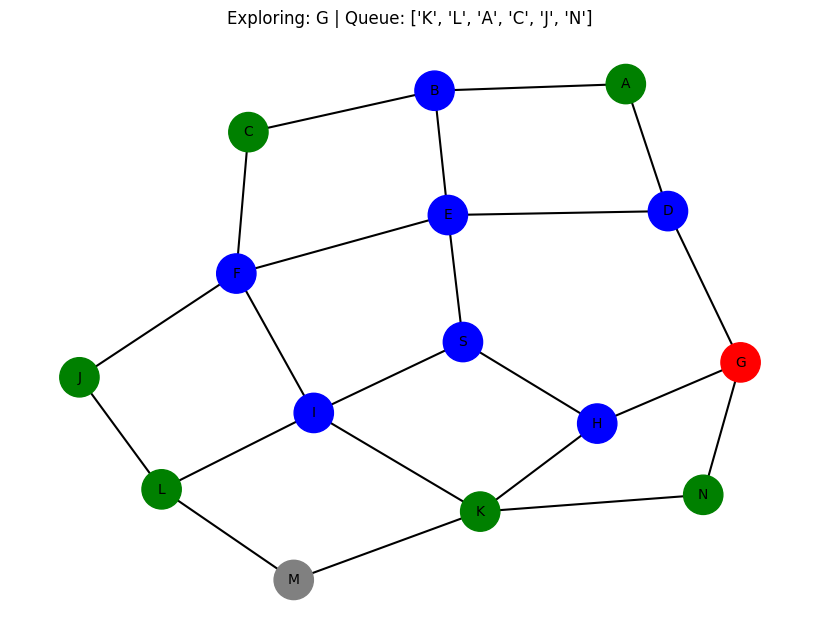

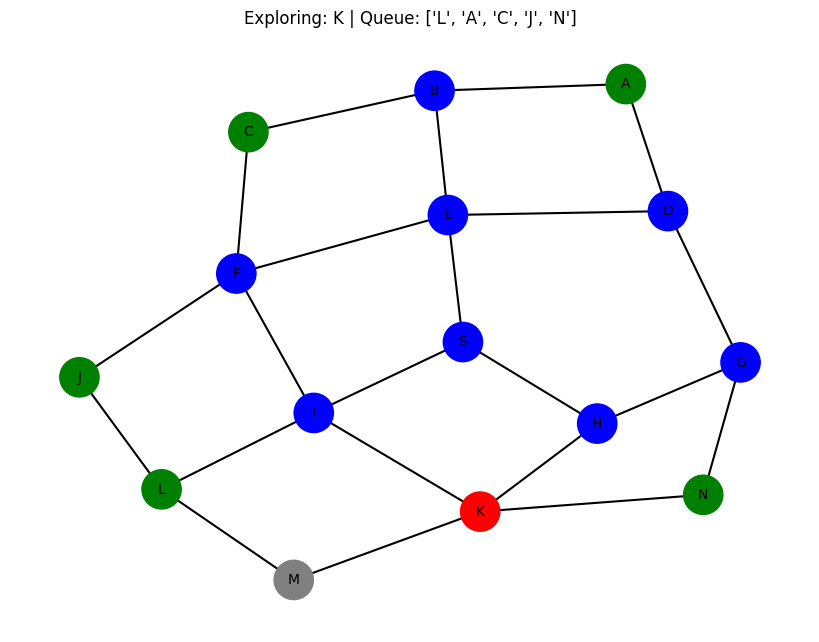

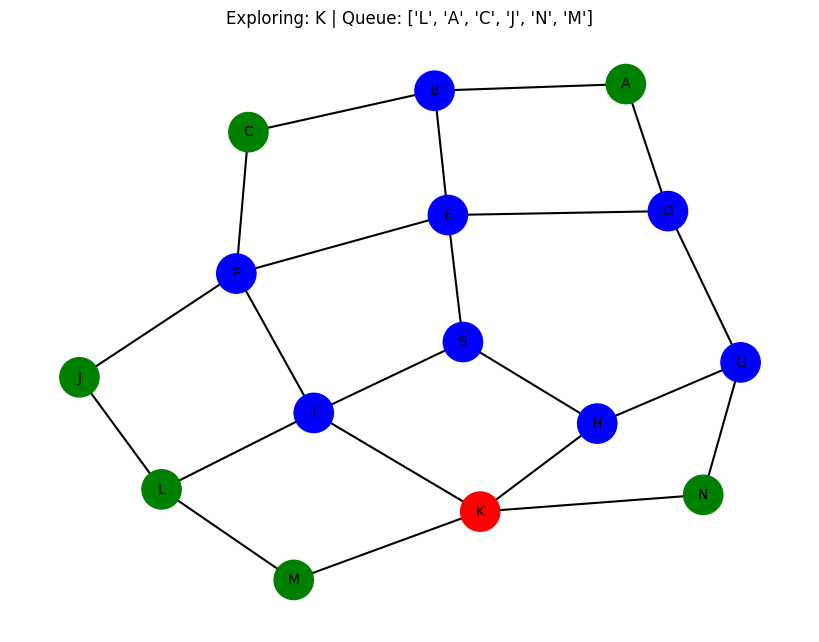

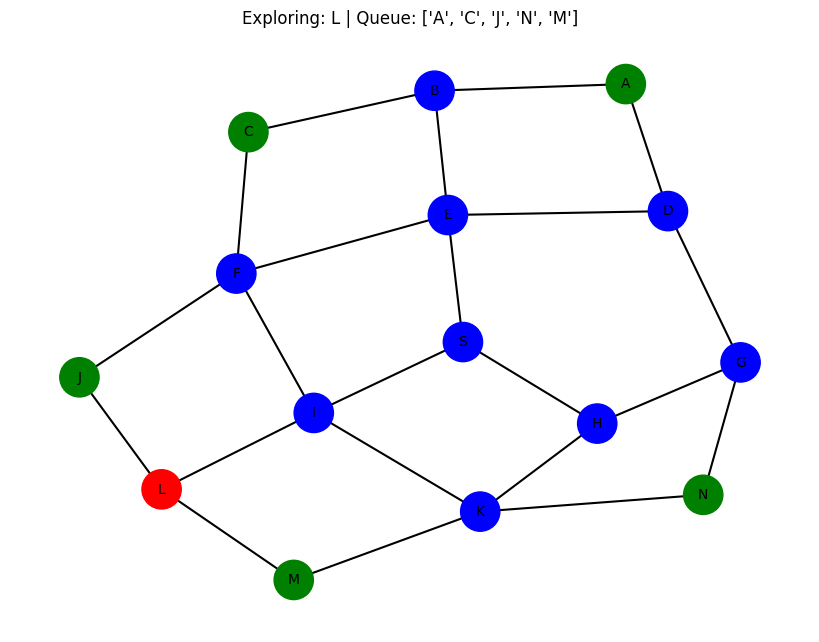

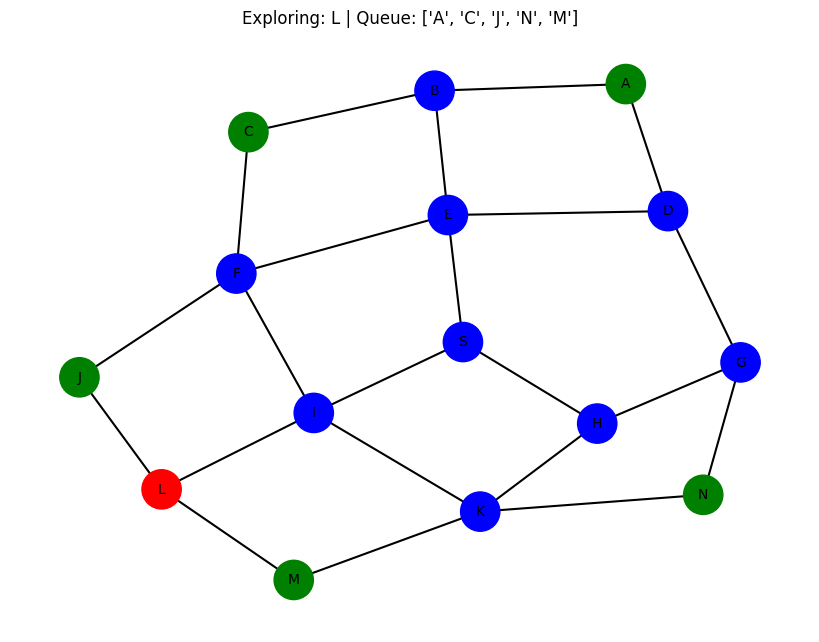

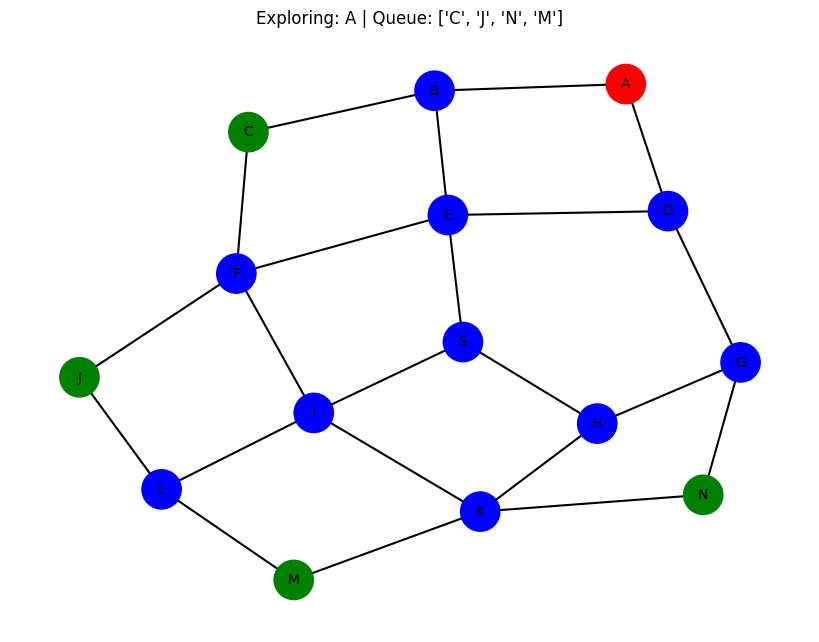

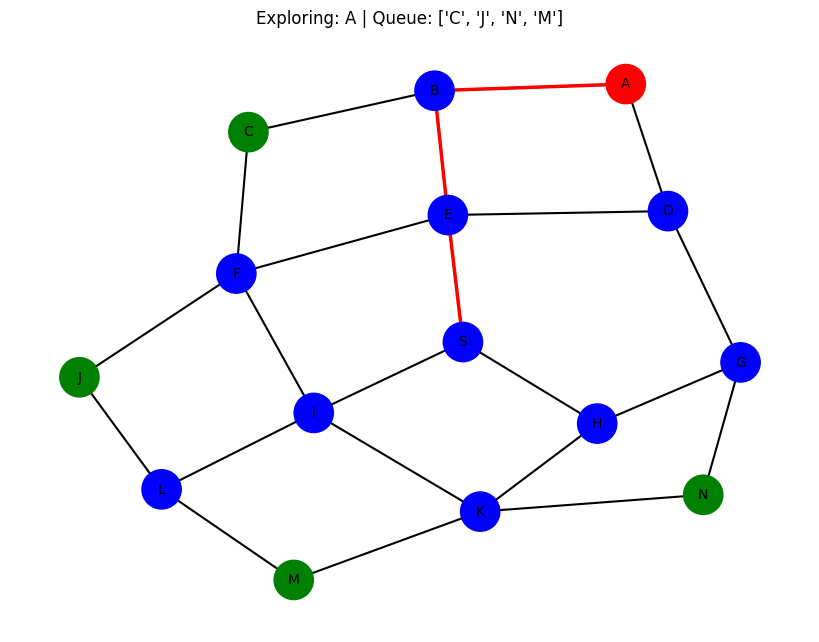


BFS Shortest Path: S → E → B → A


In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

# Define graph connections from the given image
graph = {
    'S': ['E', 'H', 'I'],
    'A': ['B', 'D'],
    'B': ['A', 'E', 'C'],
    'C': ['B', 'F'],
    'D': ['A', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['J', 'I', 'E'],
    'G': ['D', 'H', 'N'],
    'H': ['S', 'K', 'G'],
    'I': ['S', 'K', 'L', 'F'],
    'J': ['F', 'L'],
    'K': ['I', 'H', 'M', 'N'],
    'L': ['I', 'J', 'M'],
    'M': ['L', 'K'],
    'N': ['K', 'G']

}

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Function to draw the graph at each BFS step
def draw_graph(G, visited, queue, current, path=None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Auto layout for positioning

    # Assign colors to nodes
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')  # Current node being explored
        elif node in queue:
            node_colors.append('green')  # Nodes in queue (frontier)
        elif node in visited:
            node_colors.append('blue')  # Visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes

    # Draw nodes and edges (edges are black for visibility)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color="black", width=1.5, font_size=10)

    # Highlight the shortest path in **red**
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5)

    plt.title(f"Exploring: {current} | Queue: {list(queue)}", fontsize=12)
    plt.show()
    time.sleep(1)  # Pause for better step visualization

# BFS function with step-by-step visualization
def bfs_visualize(G, start, goal):
    queue = deque([start])  # BFS queue
    visited = set([start])  # Visited set
    parent = {start: None}  # Parent tracking for path reconstruction

    draw_graph(G, visited, queue, None)  # Initial state

    while queue:
        current = queue.popleft()
        draw_graph(G, visited, queue, current)  # Draw after dequeuing

        if current == goal:
            path = reconstruct_path(parent, goal)
            draw_graph(G, visited, queue, current, path)  # Highlight final path
            return path

        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
        draw_graph(G, visited, queue, current)  # Draw after adding neighbors

    return None  # Goal not found

# Reconstruct the shortest path using parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define Start and Goal nodes (Goal can be modified as needed)
start_node = "S"
goal_node = "A"  # Modify as per target location in graph

# Run BFS with Visualization
bfs_path = bfs_visualize(G, start_node, goal_node)

# Print the shortest path result
if bfs_path:
    print("\nBFS Shortest Path:", " → ".join(bfs_path))
else:
    print("\nGoal not found in the graph.")
